# 1. Libraries

In [73]:
!pip install stargazer
!pip install statsmodels
!pip install imgkit

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from stargazer.stargazer import Stargazer
from IPython.display import HTML
import imgkit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm


[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


# 2. Loading Tennis Data

In [3]:
# Load dataset 
# ATP Match Data & WTA Match Data 
# ATP Player Data & WTA Player Data
atp_match = pd.read_csv("Output/ATP_match_final_file.csv")
atp_player = pd.read_csv("atp_player_final.csv")
wta_match = pd.read_csv("Output/WTA_match_final_file.csv")
wta_player = pd.read_csv("wta_player_final.csv")

# Display first few rows
print(atp_match.head())
print(atp_player.head())
print(wta_match.head())
print(wta_player.head())

        match_id tourney_id tourney_name  tourney_date  match_num  draw_size  \
0  2023-0301-271  2023-0301     Auckland      20230109        271         32   
1  2023-0301-271  2023-0301     Auckland      20230109        271         32   
2  2023-0301-272  2023-0301     Auckland      20230109        272         32   
3  2023-0301-272  2023-0301     Auckland      20230109        272         32   
4  2023-0301-273  2023-0301     Auckland      20230109        273         32   

  tourney_level  best_of round  minutes  ...  1stWon 2ndWon  SvGms  bpSaved  \
0             A        3   R32     88.0  ...    29.0   16.0   11.0      1.0   
1             A        3   R32     88.0  ...    30.0    9.0   10.0      6.0   
2             A        3   R32    157.0  ...    49.0   20.0   17.0      5.0   
3             A        3   R32    157.0  ...    43.0   17.0   17.0      7.0   
4             A        3   R32    109.0  ...    35.0   12.0   11.0      2.0   

   bpFaced  1stWon_pct  WIN  surface_Clay  s

In [15]:
# Basic exploration    
print(atp_match.info())   
print(wta_match.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5424 entries, 0 to 5423
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       5424 non-null   object 
 1   tourney_id     5424 non-null   object 
 2   tourney_name   5424 non-null   object 
 3   tourney_date   5424 non-null   int64  
 4   match_num      5424 non-null   int64  
 5   draw_size      5424 non-null   int64  
 6   tourney_level  5424 non-null   object 
 7   best_of        5424 non-null   int64  
 8   round          5424 non-null   object 
 9   minutes        5424 non-null   float64
 10  player_id      5424 non-null   int64  
 11  player_name    5424 non-null   object 
 12  seed           5424 non-null   float64
 13  rank           5424 non-null   float64
 14  rank_points    5424 non-null   float64
 15  age            5424 non-null   float64
 16  height         5424 non-null   float64
 17  hand           5424 non-null   int64  
 18  ace     

# 3. Stargazer

In [16]:
# Add constant column for dummy regression 
atp_match['const'] = 1 
wta_match['const'] = 1 

# Use any numeric column for dummy regression 
atp_y = atp_match.select_dtypes('number').iloc[:, 0] 
wta_y = wta_match.select_dtypes('number').iloc[:, 0] 

# Dummy OLS models 
atp_model = sm.OLS(atp_y, atp_match[['const']]).fit() 
wta_model = sm.OLS(wta_y, wta_match[['const']]).fit() 

# Stargazer summary 
stargazer = Stargazer([atp_model, wta_model]) 
stargazer.title("ATP and WTA Match Data Overview") 

with open("stargazer_summary.tex", "w", encoding="utf-8") as f:
    f.write(stargazer.render_latex())


In [17]:
atp_y = atp_match["WIN"].astype(float)
wta_y = wta_match["WIN"].astype(float)

# Independent variables
X_vars = ["rank", "1stWon", "ace"]

atp_X = sm.add_constant(atp_match[X_vars])
wta_X = sm.add_constant(wta_match[X_vars])

# Fit OLS models (formatting only)
atp_model = sm.OLS(atp_y, atp_X, missing="drop").fit()
wta_model = sm.OLS(wta_y, wta_X, missing="drop").fit()

# Stargazer summary
stargazer = Stargazer([atp_model, wta_model])
stargazer.title("ATP and WTA match data overview - WIN as dependent variable")
html = stargazer.render_html()

# Display in Jupyter + save to Overleaf
HTML(html)
with open("stargazer_summary_iv.tex", "w", encoding="utf-8") as f:
    f.write(stargazer.render_latex())

In [18]:
def dataset_summary(df, name="Dataset"):
    print(f"--- {name} ---")
    summary = pd.DataFrame({
        "Column": df.columns,
        "Data Type": df.dtypes.values,
        "Missing Values": df.isnull().sum().values,
        "Unique Values": df.nunique().values
    })
    display(summary)

# Run for both match datasets
dataset_summary(atp_match, "ATP Match Data")
dataset_summary(wta_match, "WTA Match Data")


print("Number of variables in ATP Match dataset:", atp_match.shape[1])
print("Number of variables in WTA Match dataset:", wta_match.shape[1])



--- ATP Match Data ---


,Column,Data Type,Missing Values,Unique Values
0,match_id,object,0,2712
1,tourney_id,object,0,118
2,tourney_name,object,0,118
3,tourney_date,int64,0,50
4,match_num,int64,0,200
5,draw_size,int64,0,7
6,tourney_level,object,0,5
7,best_of,int64,0,2
8,round,object,0,8
9,minutes,float64,0,244


--- WTA Match Data ---


,Column,Data Type,Missing Values,Unique Values
0,match_id,object,0,2400
1,tourney_id,object,0,80
2,tourney_name,object,0,80
3,tourney_date,int64,0,44
4,match_num,int64,0,204
5,draw_size,int64,0,10
6,tourney_level,object,0,6
7,best_of,int64,0,1
8,round,object,0,8
9,minutes,float64,0,182


Number of variables in ATP Match dataset: 33
Number of variables in WTA Match dataset: 33


## 4. Data Preprocessing WTA and ATP Match Data 

In [19]:
# Check missing values
print(atp_match.isnull().sum())
print(atp_player.isnull().sum())

print(wta_match.isnull().sum())
print(wta_player.isnull().sum())

match_id         0
tourney_id       0
tourney_name     0
tourney_date     0
match_num        0
draw_size        0
tourney_level    0
best_of          0
round            0
minutes          0
player_id        0
player_name      0
seed             0
rank             0
rank_points      0
age              0
height           0
hand             0
ace              0
df               0
svpt             0
1stIn            0
1stWon           0
2ndWon           0
SvGms            0
bpSaved          0
bpFaced          0
1stWon_pct       0
WIN              0
surface_Clay     0
surface_Grass    0
surface_Hard     0
const            0
dtype: int64
player_id       0
name_first      0
name_last       0
hand            0
dob             0
ioc             0
height         15
wikidata_id    13
rank            0
dtype: int64
match_id         0
tourney_id       0
tourney_name     0
tourney_date     0
match_num        0
draw_size        0
tourney_level    0
best_of          0
round            0
minutes       

# WTA

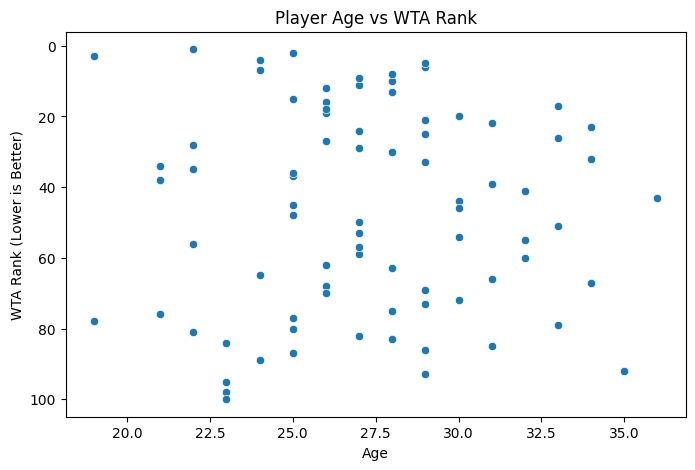

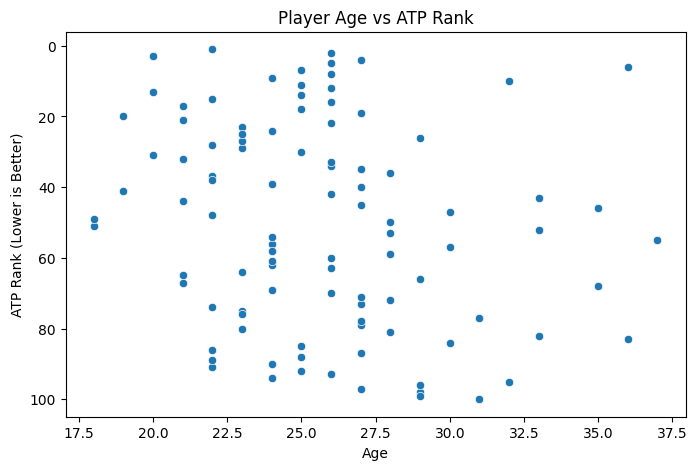

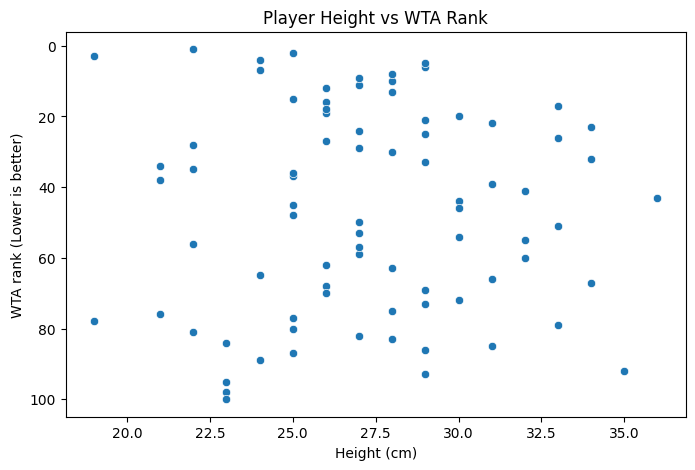

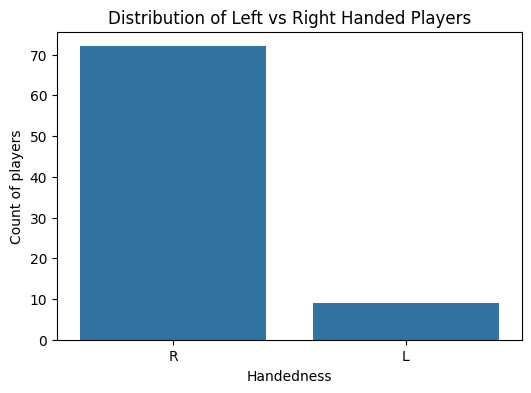

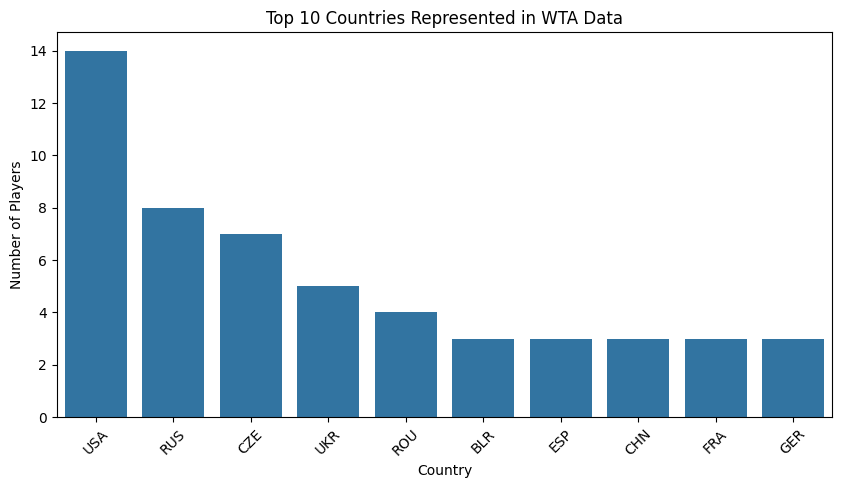

In [22]:
# Convert date of birth (dob) to age
# Extract year and compute age
wta_player["age"] = 2023 - (wta_player["dob"] // 10000) 
atp_player["age"] = 2023 - (atp_player["dob"] // 10000) 

# Drop NaN values in height for better visualisation
wta_player.dropna(subset=["height"], inplace=True)

# Plot: Age vs Rank
plt.figure(figsize=(8,5))
sns.scatterplot(x=wta_player["age"], y=wta_player["rank"])
plt.xlabel("Age")
plt.ylabel("WTA Rank (Lower is Better)")
plt.title("Player Age vs WTA Rank")
plt.gca().invert_yaxis()  # Higher rank is better
plt.savefig("AgeVsRank_WTA.png", dpi=300)
plt.show()
plt.close()

# ATP Plot: Age vs Rank
plt.figure(figsize=(8,5))
sns.scatterplot(x=atp_player["age"], y=atp_player["rank"])
plt.xlabel("Age")
plt.ylabel("ATP Rank (Lower is Better)")
plt.title("Player Age vs ATP Rank")
plt.gca().invert_yaxis()  # Higher rank is better
plt.savefig("AgeVsRank_ATP.png", dpi=300)
plt.show()
plt.close()

# Plot: Height vs Rank
plt.figure(figsize=(8,5))
sns.scatterplot(x=wta_player["age"], y=wta_player["rank"])
plt.xlabel("Height (cm)")
plt.ylabel("WTA rank (Lower is better)")
plt.title("Player Height vs WTA Rank")
plt.gca().invert_yaxis()
plt.savefig("HeightVsRank_WTA.png", dpi=300)
plt.show()
plt.close()

# Plot: Handedness Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=wta_player["hand"])
plt.xlabel("Handedness")
plt.ylabel("Count of players")
plt.title("Distribution of Left vs Right Handed Players")
plt.savefig("Handedness_Wta.png", dpi=300)
plt.show()
plt.close()

# Plot: Top 10 Countries with Most Players
plt.figure(figsize=(10,5))
top_countries = wta_player["ioc"].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xlabel("Country")
plt.ylabel("Number of Players")
plt.title("Top 10 Countries Represented in WTA Data")
plt.xticks(rotation=45)
plt.savefig("Countrie_WTA.png", dpi=300)
plt.show()
plt.close()

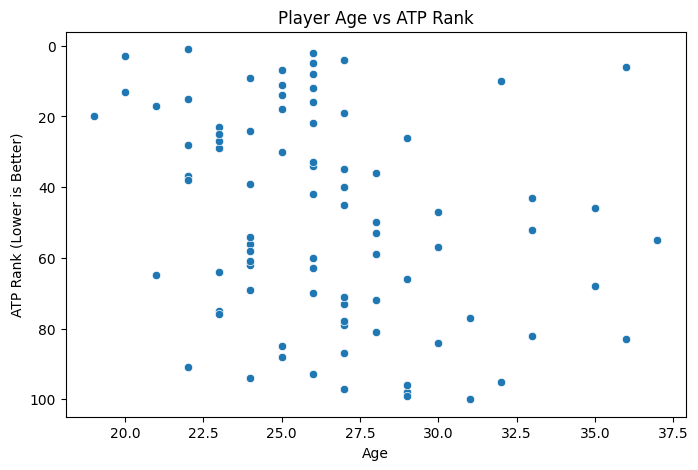

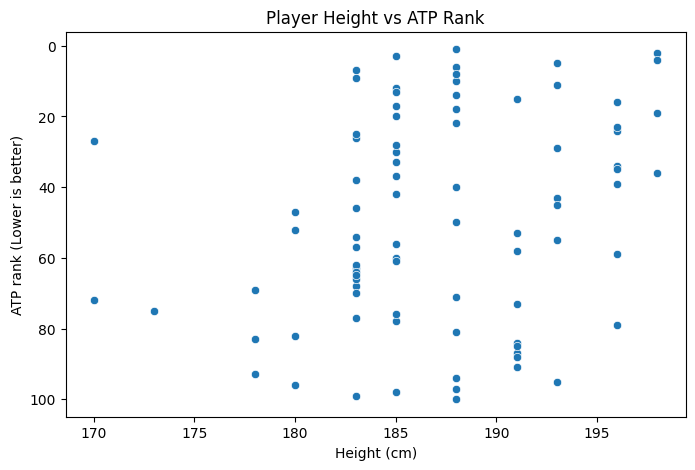

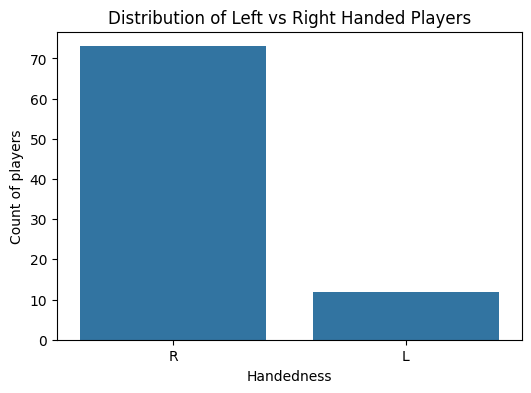

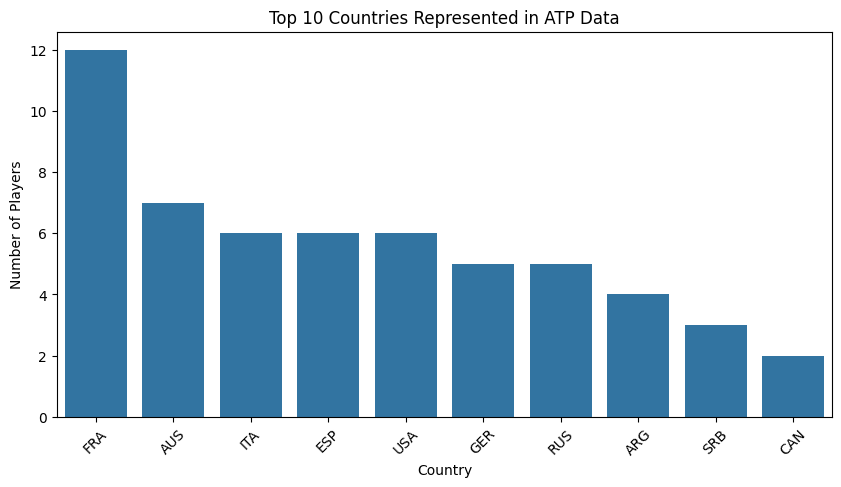

In [23]:
# Convert DOB to Age
atp_player["age"] = 2023 - (atp_player["dob"] // 10000)  # Extract year and compute age

# Drop NaN values in height for better visualization
atp_player.dropna(subset=["height"], inplace=True)

# Plot: Age vs Rank
plt.figure(figsize=(8,5))
sns.scatterplot(x=atp_player["age"], y=atp_player["rank"])
plt.xlabel("Age")
plt.ylabel("ATP Rank (Lower is Better)")
plt.title("Player Age vs ATP Rank")
plt.gca().invert_yaxis()  # Higher rank is better
plt.savefig("AgeVsRank_Atp.png", dpi=300)
plt.show()
plt.close()

# Plot: Height vs Rank
plt.figure(figsize=(8,5))
sns.scatterplot(x=atp_player["height"], y=atp_player["rank"])
plt.xlabel("Height (cm)")
plt.ylabel("ATP rank (Lower is better)")
plt.title("Player Height vs ATP Rank")
plt.gca().invert_yaxis()
plt.savefig("HeightVsRank_Atp.png", dpi=300)
plt.show()
plt.close()

# Plot: Handedness Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=atp_player["hand"])
plt.xlabel("Handedness")
plt.ylabel("Count of players")
plt.title("Distribution of Left vs Right Handed Players")
plt.savefig("Handedness_Atp", dpi=300)
plt.show()
plt.close()

# Plot: Top 10 Countries with Most Players
plt.figure(figsize=(10,5))
top_countries = atp_player["ioc"].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xlabel("Country")
plt.ylabel("Number of Players")
plt.title("Top 10 Countries Represented in ATP Data")
plt.xticks(rotation=45)
plt.savefig("Countrie_Atp.png", dpi=300)
plt.show()
plt.close()

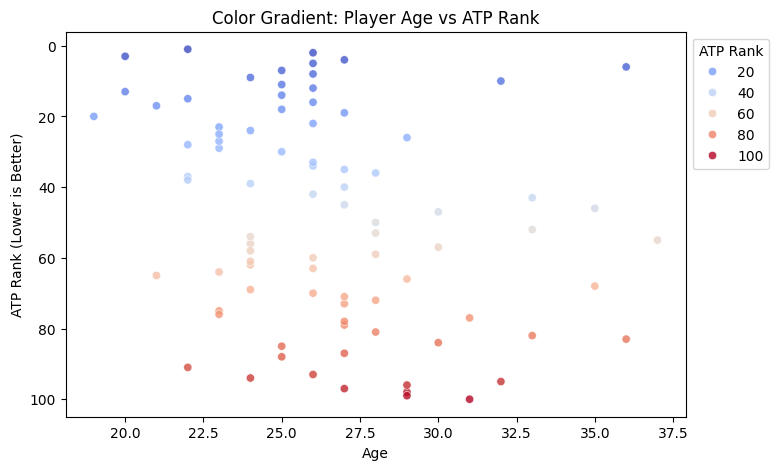

In [24]:
# Scatterplot with color mapping
plt.figure(figsize=(8,5))
sns.scatterplot(x=atp_player["age"], y=atp_player["rank"], hue=atp_player["rank"], palette="coolwarm", alpha=0.8)
plt.xlabel("Age")
plt.ylabel("ATP Rank (Lower is Better)")
plt.title("Color Gradient: Player Age vs ATP Rank")
plt.gca().invert_yaxis()
plt.legend(title="ATP Rank", bbox_to_anchor=(1,1))
plt.show()

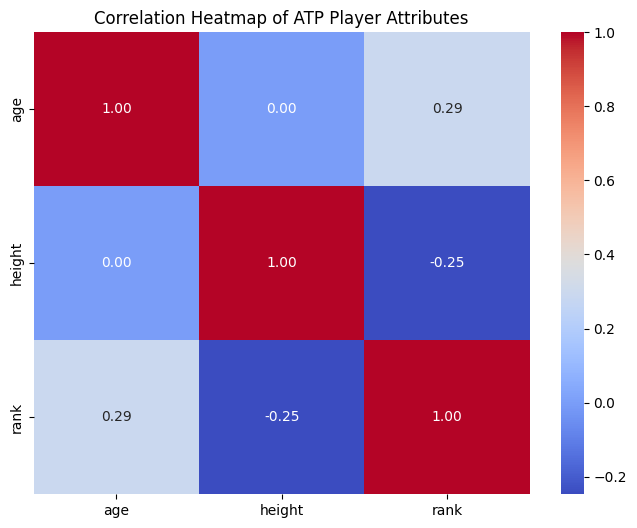

In [26]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(atp_player[["age", "height", "rank"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of ATP Player Attributes")
plt.savefig("CorrelationHeatmapAtpAttributes.png", dpi=300)
plt.show()
plt.close()

Age has a weak positive correlation with ranking, meaning older players are slightly more likely to be ranked lower (worse).
Height has a weak negative correlation with ranking, meaning taller players may have a slight advantage.
No connection between age and height.

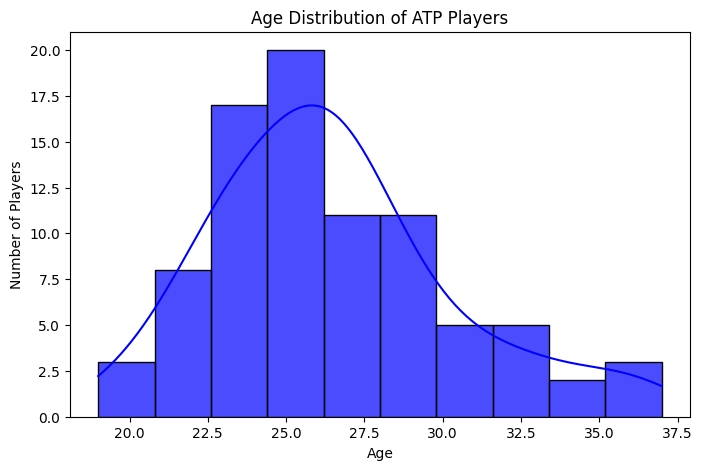

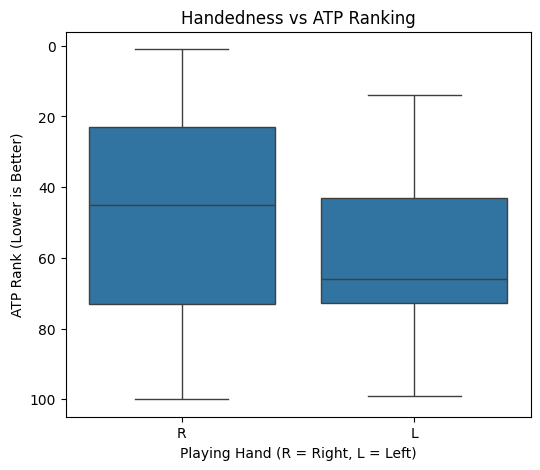

In [27]:
# Age
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(atp_player["age"], bins=10, kde=True, color="blue", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Number of Players")
plt.title("Age Distribution of ATP Players")
plt.savefig("AgeDistributionAtp.png", dpi=300)
plt.show()
plt.close()

# Boxplot: Left-Handed vs Right-Handed Players' Success
plt.figure(figsize=(6,5))
sns.boxplot(x=atp_player["hand"], y=atp_player["rank"])
plt.xlabel("Playing Hand (R = Right, L = Left)")
plt.ylabel("ATP Rank (Lower is Better)")
plt.title("Handedness vs ATP Ranking")
plt.gca().invert_yaxis()
plt.savefig("HandPlayerATP", dpi=300)
plt.show()
plt.close()

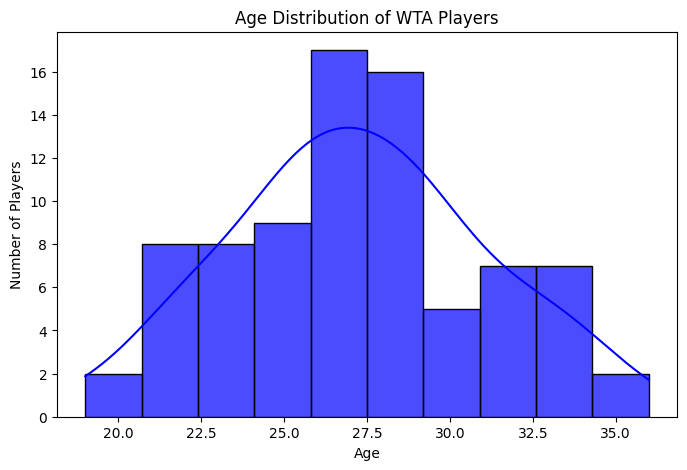

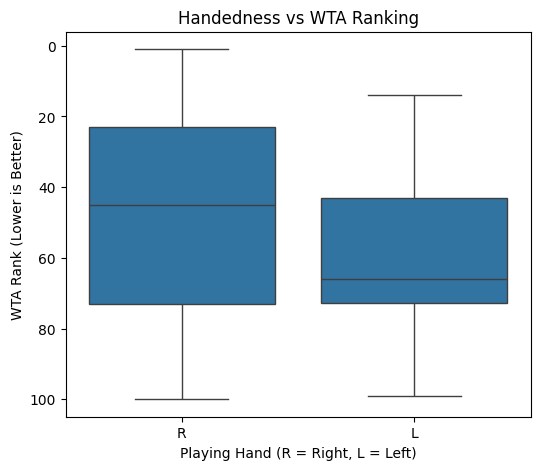

In [28]:
# WTA
# Age
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(wta_player["age"], bins=10, kde=True, color="blue", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Number of Players")
plt.title("Age Distribution of WTA Players")
plt.savefig("AgeDistributionWTA.png", dpi=300)
plt.show()
plt.close()

# Boxplot: Left-Handed vs Right-Handed Players' Success
plt.figure(figsize=(6,5))
sns.boxplot(x=atp_player["hand"], y=atp_player["rank"])
plt.xlabel("Playing Hand (R = Right, L = Left)")
plt.ylabel("WTA Rank (Lower is Better)")
plt.title("Handedness vs WTA Ranking")
plt.gca().invert_yaxis()
plt.savefig("HandPlayerWTA", dpi=300)
plt.show()
plt.close()

## Atp Match Data analyse 

In [29]:
atp_match.head()

,match_id,tourney_id,tourney_name,tourney_date,match_num,draw_size,tourney_level,best_of,round,minutes,...,2ndWon,SvGms,bpSaved,bpFaced,1stWon_pct,WIN,surface_Clay,surface_Grass,surface_Hard,const
0,2023-0301-271,2023-0301,Auckland,20230109,271,32,A,3,R32,88.0,...,16.0,11.0,1.0,1.0,0.828571,1,0,0,1,1
1,2023-0301-271,2023-0301,Auckland,20230109,271,32,A,3,R32,88.0,...,9.0,10.0,6.0,8.0,0.769231,0,0,0,1,1
2,2023-0301-272,2023-0301,Auckland,20230109,272,32,A,3,R32,157.0,...,20.0,17.0,5.0,10.0,0.569767,1,0,0,1,1
3,2023-0301-272,2023-0301,Auckland,20230109,272,32,A,3,R32,157.0,...,17.0,17.0,7.0,14.0,0.623188,0,0,0,1,1
4,2023-0301-273,2023-0301,Auckland,20230109,273,32,A,3,R32,109.0,...,12.0,11.0,2.0,4.0,0.686275,1,0,0,1,1


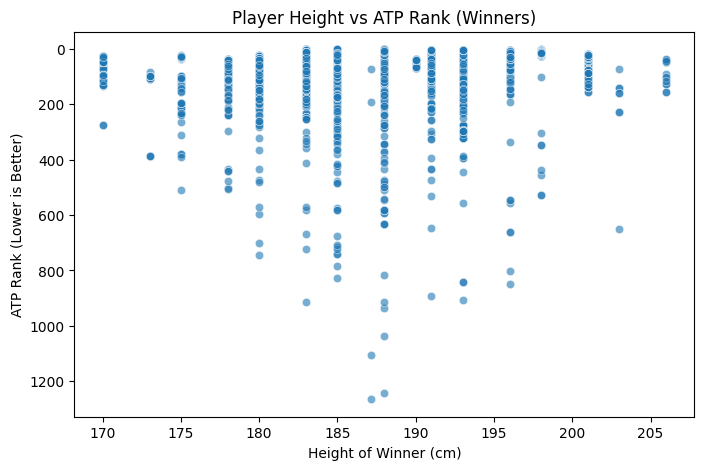

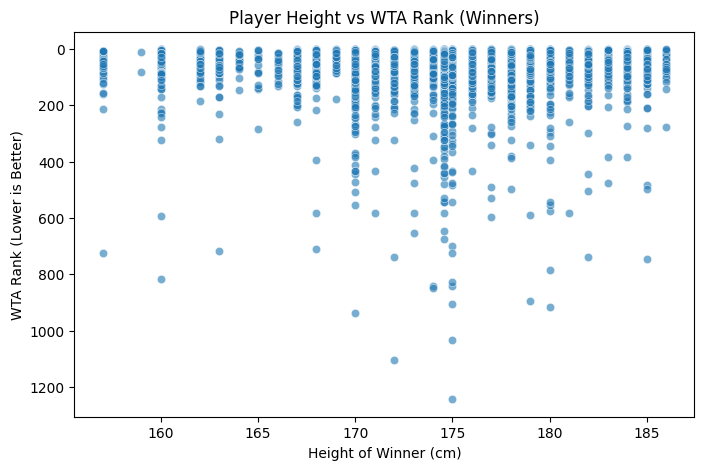

In [31]:
# ATP
# Height vs. ATP Ranking (Winner's Perspective)
plt.figure(figsize=(8,5))
sns.scatterplot(x=atp_match["height"], y=atp_match["rank"], alpha=0.6)
plt.xlabel("Height of Winner (cm)")
plt.ylabel("ATP Rank (Lower is Better)")
plt.title("Player Height vs ATP Rank (Winners)")
plt.gca().invert_yaxis()
plt.savefig("PlayerHeightAtpRank.png", dpi=300)
plt.show()
plt.close()

#WTA 
plt.figure(figsize=(8,5))
sns.scatterplot(x=wta_match["height"], y=atp_match["rank"], alpha=0.6)
plt.xlabel("Height of Winner (cm)")
plt.ylabel("WTA Rank (Lower is Better)")
plt.title("Player Height vs WTA Rank (Winners)")
plt.gca().invert_yaxis()
plt.savefig("PlayerHeightWTARank.png", dpi=300)
plt.show()
plt.close()

## 

/var/folders/tf/bv57pwsn06q3k6xg7rc9yfvm0000gn/T/ipykernel_59742/2216253352.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Surface Type", y="Match Count", data=surface_df, palette=['brown', 'blue', 'green'])


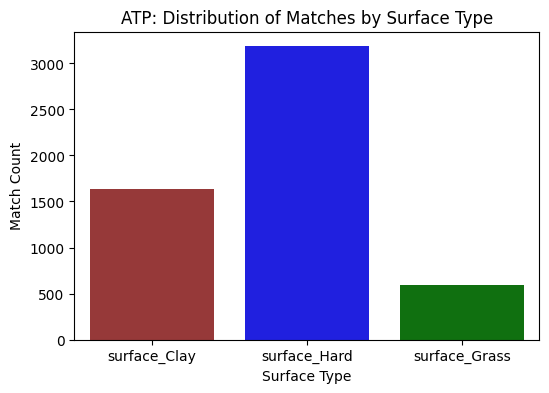

/var/folders/tf/bv57pwsn06q3k6xg7rc9yfvm0000gn/T/ipykernel_59742/2216253352.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Surface Type", y="Match Count", data=surface_df, palette=['brown', 'blue', 'green'])


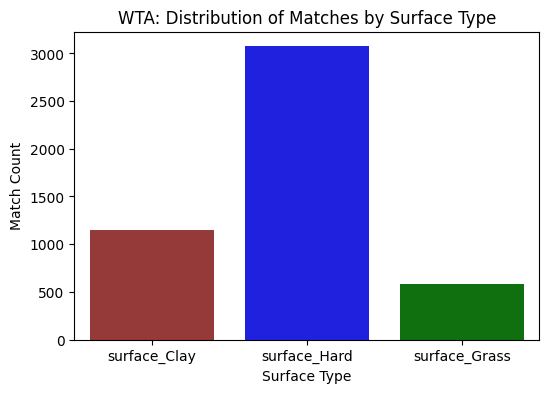

In [62]:
# ATP
# Sum up number of matches played on each surface
surface_counts = atp_match[['surface_Clay', 'surface_Hard', 'surface_Grass']].sum()
surface_df = surface_counts.reset_index()
surface_df.columns = ["Surface Type", "Match Count"]

# Plot surface distribution
plt.figure(figsize=(6,4))
sns.barplot(x="Surface Type", y="Match Count", data=surface_df, palette=['brown', 'blue', 'green'])
plt.xlabel("Surface Type")
plt.ylabel("Match Count")
plt.title("ATP: Distribution of Matches by Surface Type")
plt.savefig("MatchDistributionSurfaceATP.png", dpi=300)
plt.show()
plt.close()

# WTA
surface_counts = wta_match[['surface_Clay', 'surface_Hard', 'surface_Grass']].sum()
surface_df = surface_counts.reset_index()
surface_df.columns = ["Surface Type", "Match Count"]

# Plot surface distribution
plt.figure(figsize=(6,4))
sns.barplot(x="Surface Type", y="Match Count", data=surface_df, palette=['brown', 'blue', 'green'])
plt.xlabel("Surface Type")
plt.ylabel("Match Count")
plt.title("WTA: Distribution of Matches by Surface Type")
plt.savefig("MatchDistributionSurfaceWTA.png", dpi=300)
plt.show()
plt.close()

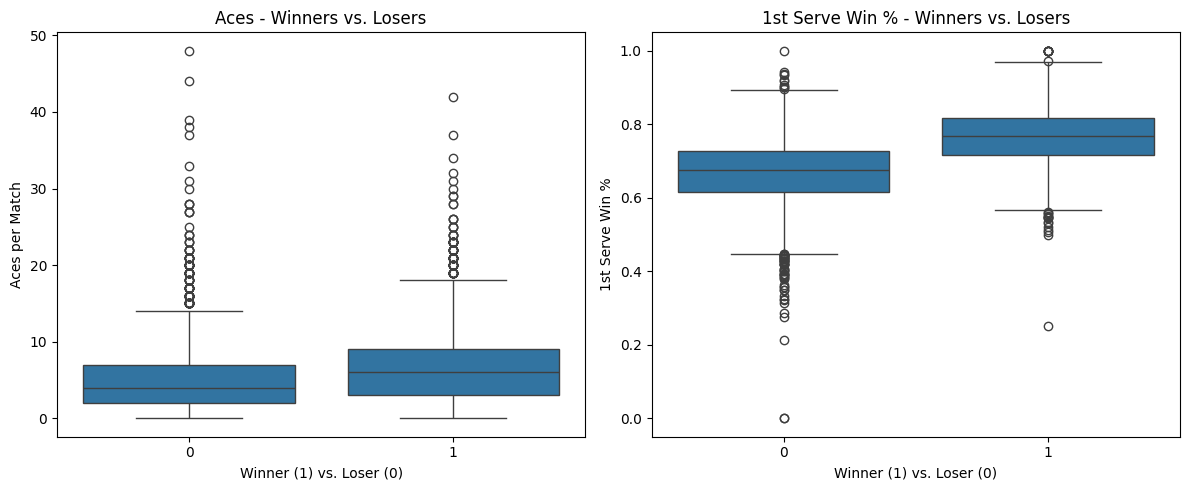

In [32]:
# Winners vs. Losers - Aces & Serve Performance
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Aces per Match (Winners vs. Losers)
sns.boxplot(data=atp_match, x="WIN", y="ace", ax=axes[0])
axes[0].set_title("Aces - Winners vs. Losers")
axes[0].set_xlabel("Winner (1) vs. Loser (0)")
axes[0].set_ylabel("Aces per Match")

# 1st Serve Win % (Winners vs. Losers)
sns.boxplot(data=atp_match, x="WIN", y="1stWon_pct", ax=axes[1])
axes[1].set_title("1st Serve Win % - Winners vs. Losers")
axes[1].set_xlabel("Winner (1) vs. Loser (0)")
axes[1].set_ylabel("1st Serve Win %")

plt.tight_layout()
plt.savefig("WinnersVsLosers_Aces_ServePerformance.png", dpi=250)  
plt.show()
plt.close()


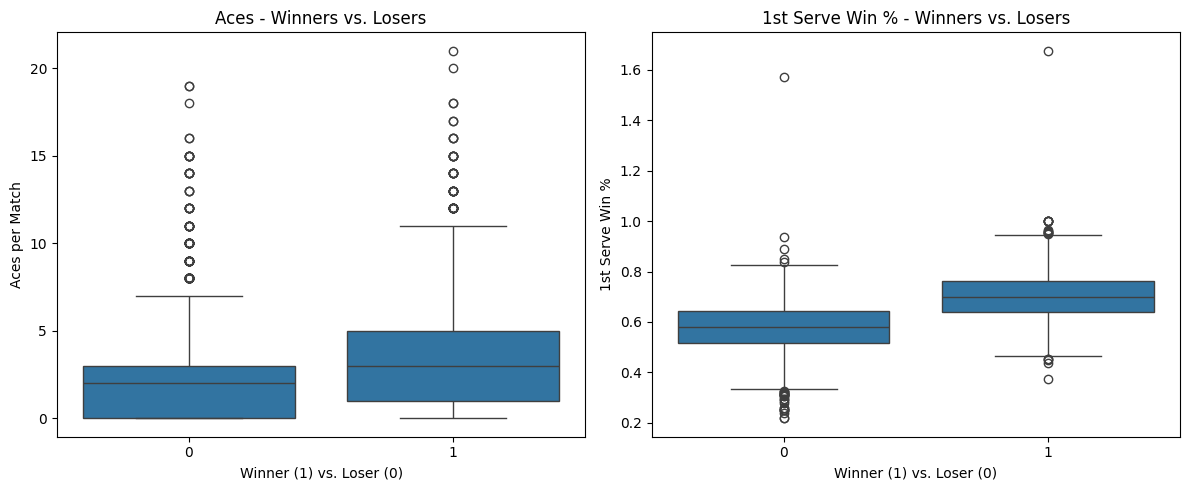

In [33]:
# Winners vs. Losers - Aces & Serve Performance
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Aces per Match (Winners vs. Losers)
sns.boxplot(data=wta_match, x="WIN", y="ace", ax=axes[0])
axes[0].set_title("Aces - Winners vs. Losers")
axes[0].set_xlabel("Winner (1) vs. Loser (0)")
axes[0].set_ylabel("Aces per Match")

# 1st Serve Win % (Winners vs. Losers)
sns.boxplot(data=wta_match, x="WIN", y="1stWon_pct", ax=axes[1])
axes[1].set_title("1st Serve Win % - Winners vs. Losers")
axes[1].set_xlabel("Winner (1) vs. Loser (0)")
axes[1].set_ylabel("1st Serve Win %")

plt.tight_layout()
plt.savefig("WinnersVsLosers_Aces_ServePerformance_WTA.png", dpi=250)  
plt.show()
plt.close()

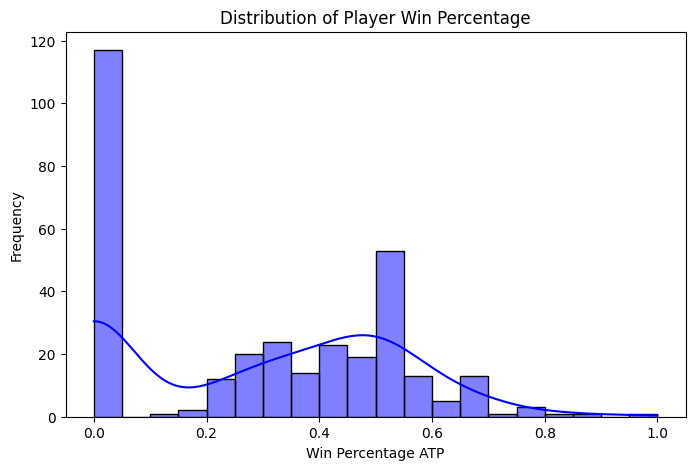

In [70]:
# Distribution of win percentage
# Checks if the dataset is balanced or if most players have a similar win rate

# Calculate win percentage per player
player_stats = atp_match.groupby("player_name").agg(
    matches_played=pd.NamedAgg(column="WIN", aggfunc="count"),
    matches_won=pd.NamedAgg(column="WIN", aggfunc="sum")
)
player_stats["win_percentage"] = player_stats["matches_won"] / player_stats["matches_played"]

# Plot: Distribution of win percentage
plt.figure(figsize=(8,5))
sns.histplot(player_stats["win_percentage"], bins=20, kde=True, color="blue")
plt.xlabel("Win Percentage ATP")
plt.ylabel("Frequency")
plt.title("Distribution of Player Win Percentage")
plt.savefig("Player_Win_Percentage_Distribution.png", dpi=250)  # Corrected filename
plt.show()
plt.close()


# left-skewed, most players have low win rates
# Analyse the distribution of player win percentages across the season
# Most players have very low win rates due to the competitive structure of the ATP tour,
# where only one player wins per match and top players dominate match victories.
# The distribution is left-skewed, highlighting that success is concentrated among a few players
# This insight supports using win percentage as a strong predictor in player performance modeling

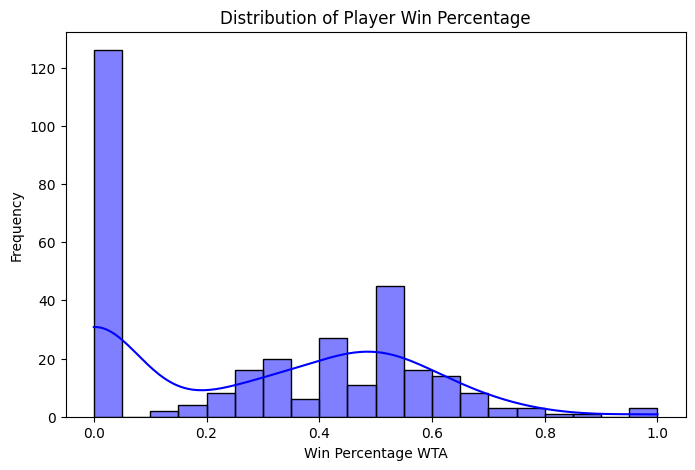

In [34]:
# Distribution of win percentage
# Checks if the dataset is balanced or if most players have a similar win rate

# Calculate win percentage per player for WTA
player_stats = wta_match.groupby("player_name").agg(
    matches_played=pd.NamedAgg(column="WIN", aggfunc="count"),
    matches_won=pd.NamedAgg(column="WIN", aggfunc="sum")
)
player_stats["win_percentage"] = player_stats["matches_won"] / player_stats["matches_played"]

# Plot: Distribution of win percentage
plt.figure(figsize=(8,5))
sns.histplot(player_stats["win_percentage"], bins=20, kde=True, color="blue")
plt.xlabel("Win Percentage WTA")
plt.ylabel("Frequency")
plt.title("Distribution of Player Win Percentage")
plt.savefig("Player_Win_Percentage_DistributionWTA.png", dpi=250)  # Corrected filename
plt.show()
plt.close()


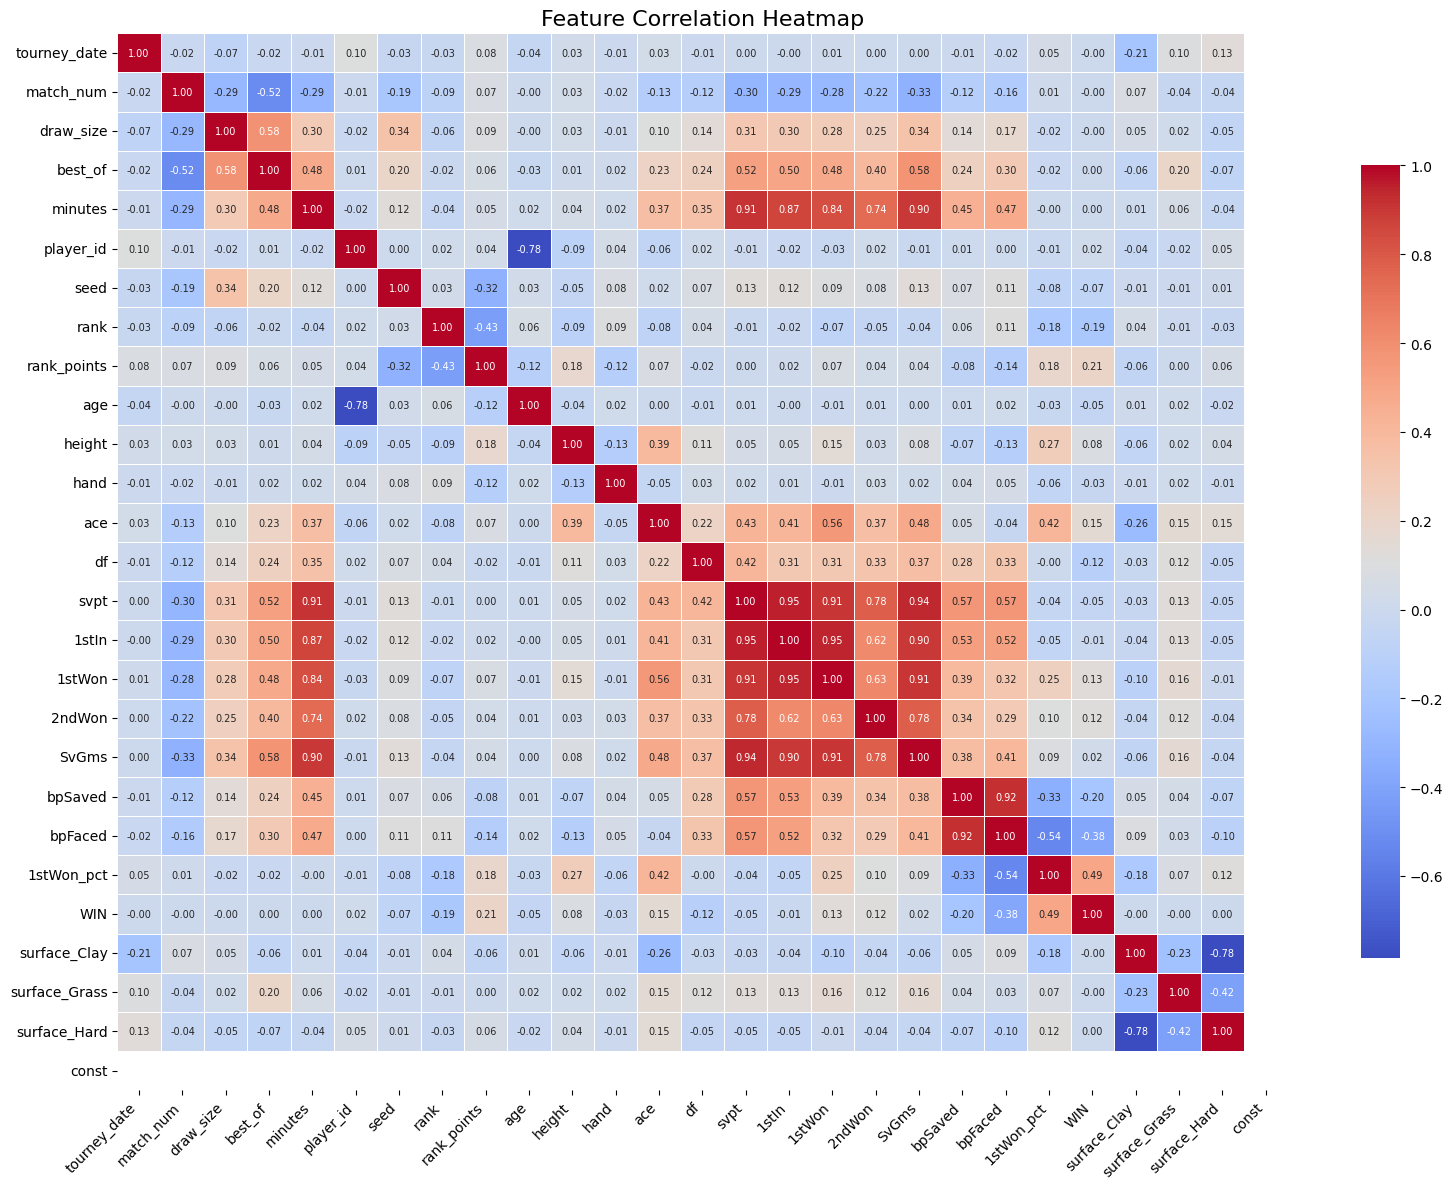

In [35]:
# Calculate correlation matrix
corr_matrix = atp_match.corr(numeric_only=True)

# Create full heatmap
plt.figure(figsize=(16,12))
sns.heatmap(
    corr_matrix,
    annot=True,                 # show numbers
    cmap="coolwarm",            # color scheme
    fmt=".2f",                  # 2 decimal places
    linewidths=0.5,             # grid lines
    annot_kws={"size": 7},      # smaller font size
    cbar_kws={"shrink": 0.75}   # shrink color bar
)

# Make axis labels readable
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Title and layout
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()

# Save and display
plt.savefig("CorrelationHeatmapATP_FullMatrix.png", dpi=300)
plt.show()
plt.close()



# Values near +1 mean a strong positive correlation (e.g., rank_points vs. rank)
# Values near -1 mean a strong negative correlation (e.g., rank vs. WIN, since lower rank = better player
# If WIN has high correlations with ranking, serve stats, or height, these might be important predictors

# Correlation Analysis - Key Insights:
# heatmap helps identify features that are strongly associated with match outcomes ->WIN
# Positive correlations with WIN include:
# - rank_points: Higher-ranked players (more points) tend to win more matches.
# - 1stWon, 1stWon_pct: Winning on the first serve is crucial for success.
# - SvGms (service games won): Strong servers have a higher chance of winning.
# Negative correlations with WIN:
# - rank: Lower numeric rank (better player) is associated with more wins.
# - bpFaced: Players who face fewer break points tend to win more matches.
# Features with high correlation to each other (e.g., 1stIn, Svpt, SvGms) may cause multicollinearity.
# For predictive modeling, focus on features with strong correlation to WIN while avoiding redundant variables.



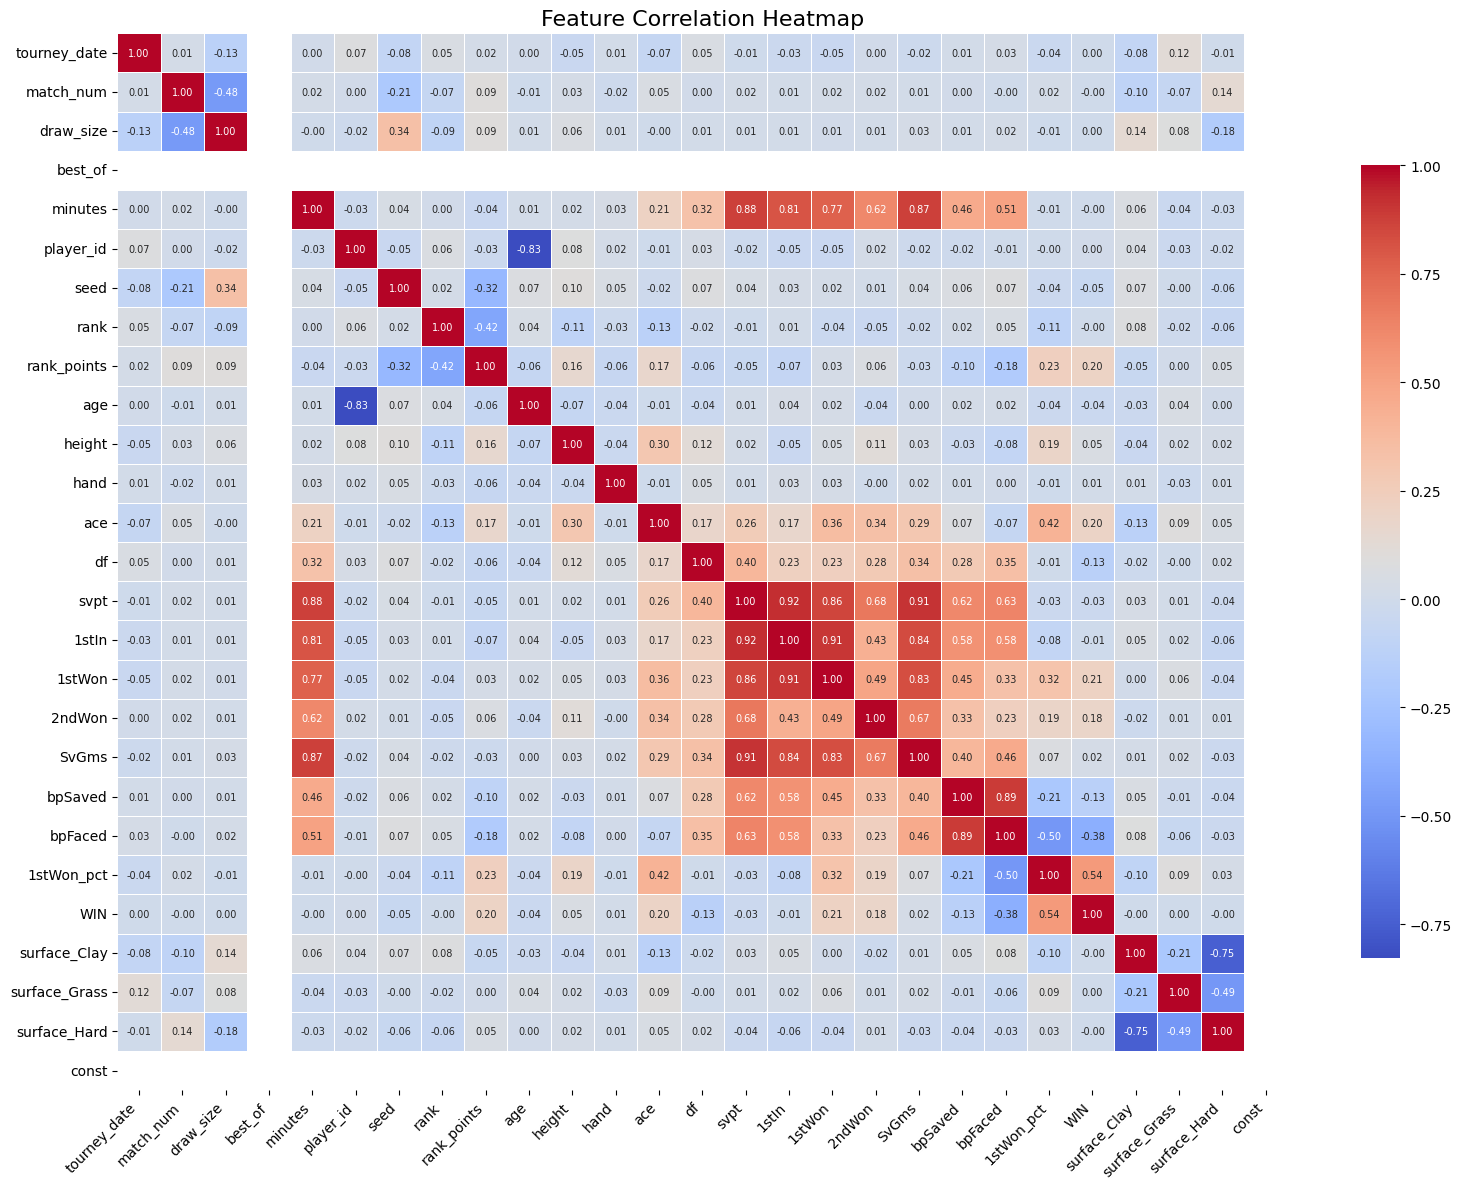

In [38]:
# Calculate correlation matrix
corr_matrix = wta_match.corr(numeric_only=True)

# since the "best_of" is always the numeric number 3, it is going to be eliminated because we dont have any variation and this does not show anything in the corelation matrix
wta_clean = wta_match.loc[:, wta_match.nunique() > 1]


# Create full heatmap
plt.figure(figsize=(16,12))
sns.heatmap(
    corr_matrix,
    annot=True,                 # show numbers
    cmap="coolwarm",            # color scheme
    fmt=".2f",                  # 2 decimal places
    linewidths=0.5,             # grid lines
    annot_kws={"size": 7},      # smaller font size
    cbar_kws={"shrink": 0.75}   # shrink color bar
)

# Make axis labels readable
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()

plt.savefig("CorrelationHeatmapWTA_FullMatrix.png", dpi=300)
plt.show()
plt.close()

# In WTA matches, success (WIN) is most positively correlated with:
# - 1st serve win percentage (1stWon_pct)
# - Ranking points (rank_points)
# - Service games won (SvGms)
# - Break points saved (bpSaved)
# A high number of break points faced (bpFaced) negatively correlates with match wins.
# Serve-related features are highly correlated with each other, so only a few should be selected to avoid multicollinearity.


/var/folders/tf/bv57pwsn06q3k6xg7rc9yfvm0000gn/T/ipykernel_28320/2138673095.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=atp_match, x="WIN", y="1stWon_pct", palette="magma")


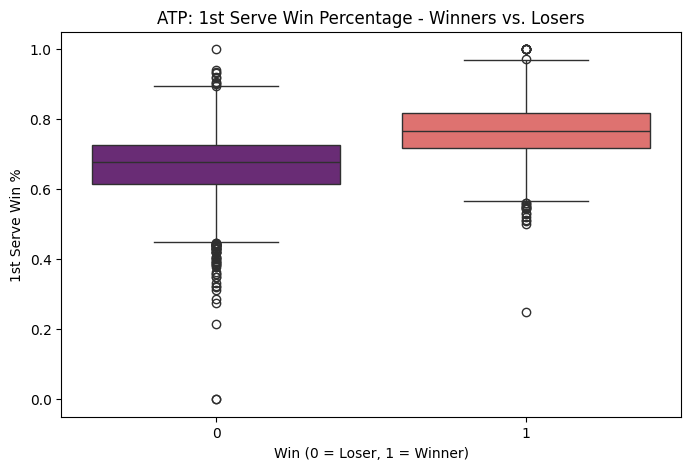

/var/folders/tf/bv57pwsn06q3k6xg7rc9yfvm0000gn/T/ipykernel_28320/2138673095.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=wta_match, x="WIN", y="1stWon_pct", palette="magma")


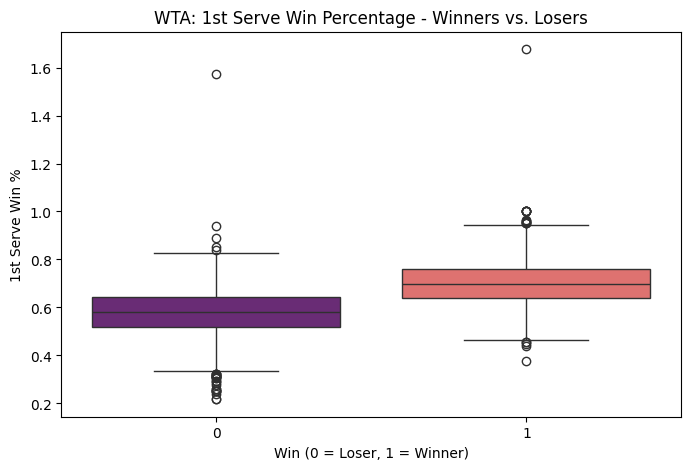

In [39]:
# ATP
# Serve Performance vs. Win Rate 
plt.figure(figsize=(8,5))
sns.boxplot(data=atp_match, x="WIN", y="1stWon_pct", palette="magma")
plt.xlabel("Win (0 = Loser, 1 = Winner)")
plt.ylabel("1st Serve Win %")
plt.title("ATP: 1st Serve Win Percentage - Winners vs. Losers")
plt.savefig("1stserveWinPercentageATP.png", dpi=300)
plt.show()

#Boxplots compare winners and losers based on first-serve win percentage.
#If winners have higher median values than losers, it suggests that first serve success is critical.
#Overlapping distributions indicate that this feature alone may not be enough to predict wins.

# WTA 
# Serve Performance vs. Win Rate 
plt.figure(figsize=(8,5))
sns.boxplot(data=wta_match, x="WIN", y="1stWon_pct", palette="magma")
plt.xlabel("Win (0 = Loser, 1 = Winner)")
plt.ylabel("1st Serve Win %")
plt.title("WTA: 1st Serve Win Percentage - Winners vs. Losers")
plt.savefig("1stserveWinPercentageWTA.png", dpi=300)
plt.show()


/var/folders/tf/bv57pwsn06q3k6xg7rc9yfvm0000gn/T/ipykernel_28320/1283035804.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=atp_match, x="WIN", y="rank", palette="viridis")


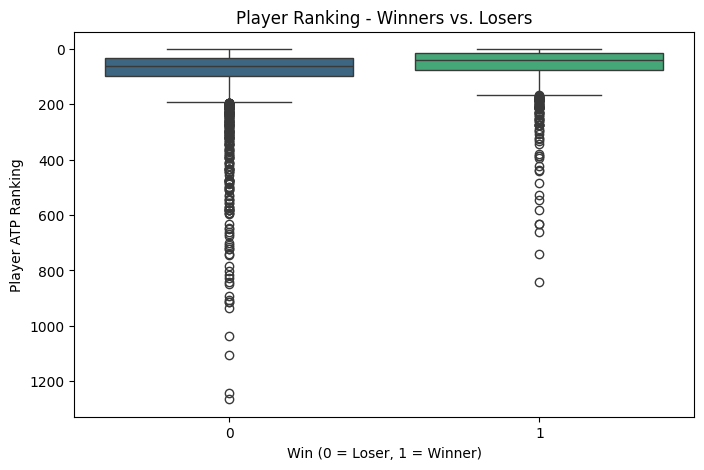

/var/folders/tf/bv57pwsn06q3k6xg7rc9yfvm0000gn/T/ipykernel_28320/1283035804.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=wta_match, x="WIN", y="rank", palette="viridis")


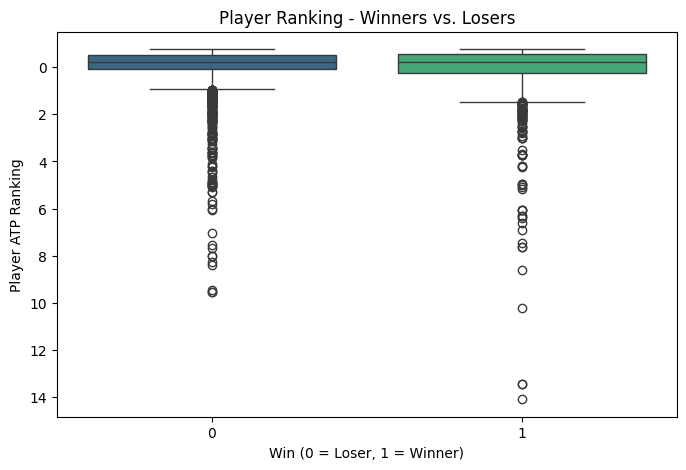

In [40]:
# ATP
# Ranking vs. Win Rate 
plt.figure(figsize=(8,5))
sns.boxplot(data=atp_match, x="WIN", y="rank", palette="viridis")
plt.xlabel("Win (0 = Loser, 1 = Winner)")
plt.ylabel("Player ATP Ranking")
plt.title("Player Ranking - Winners vs. Losers")
plt.gca().invert_yaxis()  # Lower rank = better player
plt.savefig("RankingWinRateATP", dpi=300)
plt.show()

#Lower-ranked players (closer to rank to 1) should have higher win rates
#If the median rank for winners is significantly lower than for losers, ranking is a strong predictor
#If there’s a lot of overlap, ranking alone may not be the best predictor of success

# WTA 
plt.figure(figsize=(8,5))
sns.boxplot(data=wta_match, x="WIN", y="rank", palette="viridis")
plt.xlabel("Win (0 = Loser, 1 = Winner)")
plt.ylabel("Player ATP Ranking")
plt.title("Player Ranking - Winners vs. Losers")
plt.gca().invert_yaxis()  # Lower rank = better player
plt.savefig("RankingWinRateWTA", dpi=300)
plt.show()



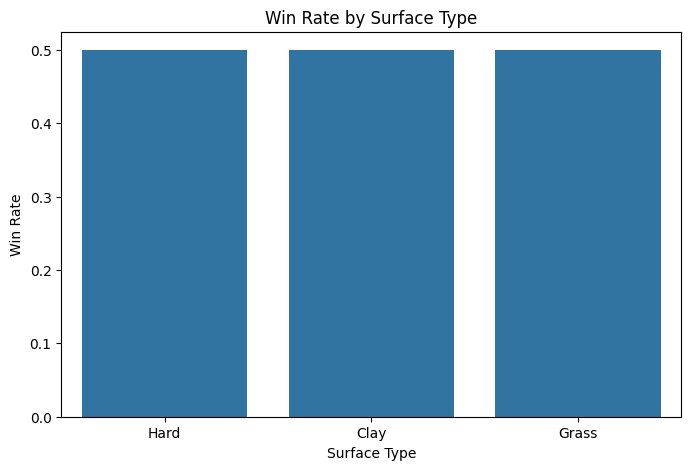

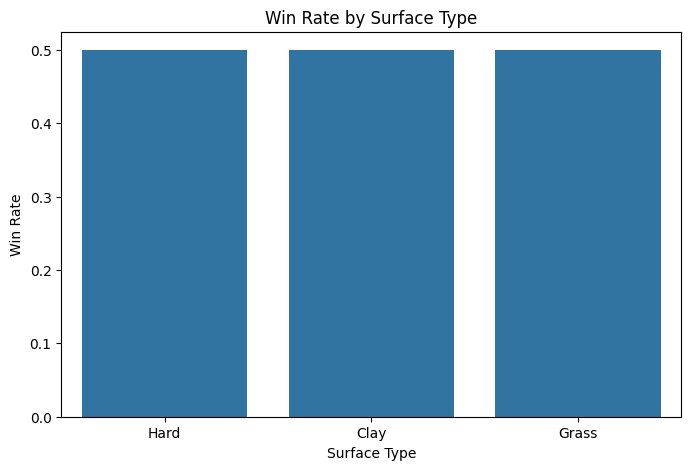

In [41]:
# ATP
# Surface Type vs. Win Rate
plt.figure(figsize=(8,5))
sns.barplot(x=["Hard", "Clay", "Grass"], 
            y=[atp_match[atp_match["surface_Hard"] == 1]["WIN"].mean(), 
               atp_match[atp_match["surface_Clay"] == 1]["WIN"].mean(), 
               atp_match[atp_match["surface_Grass"] == 1]["WIN"].mean()])
plt.xlabel("Surface Type")
plt.ylabel("Win Rate")
plt.title("Win Rate by Surface Type")
plt.savefig("SurfaceWInRateATP.png", dpi=300)
plt.show()

#WTA 
plt.figure(figsize=(8,5))
sns.barplot(x=["Hard", "Clay", "Grass"], 
            y=[wta_match[wta_match["surface_Hard"] == 1]["WIN"].mean(), 
               wta_match[wta_match["surface_Clay"] == 1]["WIN"].mean(), 
               wta_match[wta_match["surface_Grass"] == 1]["WIN"].mean()])
plt.xlabel("Surface Type")
plt.ylabel("Win Rate")
plt.title("Win Rate by Surface Type")
plt.savefig("SurfaceWInRateWTA.png", dpi=300)
plt.show()

# win rates are similar across surfaces -> surface type has less impact on winning probability

## Applying Logisitc regression 
1. Select features (X) and target (y)
2. Train-Test Split (80% training, 20% testing)
3. Scale features for better model performance
4. Train logistic regression model
5. Evaluate the model (Accuracy, Precision, Recall, Confusion Matrix)
6. Analyse feature importance to identify success factors

In [42]:
# libraries
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
# Define features (X) and target variable (y)
features = [
    "rank", "rank_points", "age", "height", "ace", "df", "svpt","1stWon", "1stIn", "2ndWon", "SvGms", "bpSaved", "bpFaced", "1stWon_pct",
    "surface_Clay", "surface_Grass", "surface_Hard"] 


X = atp_match[features]  # Independent variables (player attributes)
y = atp_match['WIN']  # Target variable (1 = winner, 0 = loser)

# Split data into training & test Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardise features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Train the logisitc regression model 

model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = model.predict(X_test_scaled)

In [46]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print("Model Trained Successfully!")
print(f" Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Model Trained Successfully!
 Accuracy: 0.8083

Confusion Matrix:
 [[455 112]
 [ 96 422]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       567
           1       0.79      0.81      0.80       518

    accuracy                           0.81      1085
   macro avg       0.81      0.81      0.81      1085
weighted avg       0.81      0.81      0.81      1085



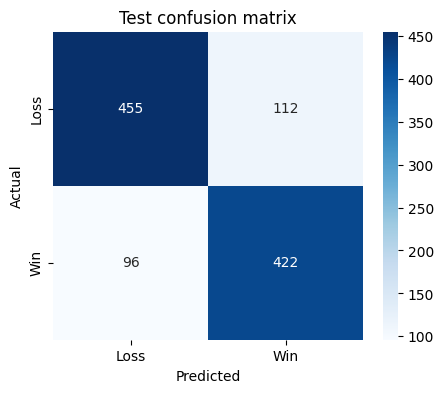

In [47]:
# Confusion matrix
test_conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Test confusion matrix")
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()
plt.close()

Confusion Matrix: 
112 losses misclassified as wins
97 wins misclassified as losses

Classification Report:
Precision (0.82 for losses, 0.79 for wins): How often the model is correct when predicting a win or loss.
Recall (0.80 for losses, 0.81 for wins): How well the model finds all true wins/losses.
Balanced Performance: F1-scores around 0.80 show consistency.

In [48]:
# Identify key success fyctors 
# Feature importance analysis
feature_importance = pd.DataFrame({'Feature': features, 'Importance': np.abs(model.coef_[0])})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display top success factors
print("\n Top Success Factors:\n", feature_importance)


 Top Success Factors:
           Feature  Importance
8           1stIn    3.550591
6            svpt    2.819069
12        bpFaced    2.355099
11        bpSaved    1.847993
13     1stWon_pct    1.399597
7          1stWon    1.391168
9          2ndWon    1.184774
14   surface_Clay    0.231480
0            rank    0.207563
1     rank_points    0.205815
4             ace    0.152153
3          height    0.149515
10          SvGms    0.143484
15  surface_Grass    0.106050
5              df    0.058598
16   surface_Hard    0.035034
2             age    0.009934


First Serve In % (1stIn) has the highest impact on winning.
Total Service Points Played (svpt) is also strongly influential.
Break Points Faced (bpFaced) and Saved (bpSaved) are key indicators of match success.
First Serve Win Percentage (1stWon_pct) also plays a significant role.

In [49]:
# Store feature importance for each surface
surface_importance_results = {}

# Define relevant features (exclude surface columns to avoid leakage)
features = [
    "rank", "rank_points", "age", "height", "ace", "df", "svpt", 
    "1stWon", "1stIn", "2ndWon", "SvGms", "bpSaved", "bpFaced", "1stWon_pct"
]

# Loop through each surface type
for surface in ["surface_Hard", "surface_Clay", "surface_Grass"]:
    # Select matches played on the given surface
    atp_surface = atp_match[atp_match[surface] == 1]
    
    # Define features and target
    X_surface = atp_surface[features]
    y_surface = atp_surface["WIN"]

    # Split Data (80% Train, 20% Test)
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_surface, y_surface, test_size=0.2, random_state=42)

    # Scale Features (Fit on Train, Transform on Train & Test)
    scaler = StandardScaler()
    X_train_s_scaled = scaler.fit_transform(X_train_s)
    X_test_s_scaled = scaler.transform(X_test_s)

    # Train Random Forest Model
    rf_surface = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_surface.fit(X_train_s_scaled, y_train_s)

    # Extract feature importance
    feature_imp_s = pd.DataFrame({"Feature": features, "Importance": rf_surface.feature_importances_})
    feature_imp_s = feature_imp_s.sort_values(by="Importance", ascending=False)
    
    # Store results
    surface_importance_results[surface] = feature_imp_s
    
    # Print Top 5 Features for Each Surface
    print(f"\nSuccess Factors for {surface}:")
    print(feature_imp_s.head(5))


Success Factors for surface_Hard:
        Feature  Importance
13   1stWon_pct    0.193559
12      bpFaced    0.128319
1   rank_points    0.074054
0          rank    0.071048
9        2ndWon    0.068571

Success Factors for surface_Clay:
        Feature  Importance
13   1stWon_pct    0.184481
12      bpFaced    0.130977
7        1stWon    0.081835
1   rank_points    0.072596
0          rank    0.066990

Success Factors for surface_Grass:
        Feature  Importance
13   1stWon_pct    0.193298
12      bpFaced    0.151070
1   rank_points    0.066434
7        1stWon    0.063292
4           ace    0.062950


Interpretation of results

If 1st serve win % is critical on Hard but not on Clay, adjust training strategies.
If height matters more on Grass than Clay, adjust player selection & coaching.
This directly answers your research question about player success differences.


Cluster 0 = Strong Servers (High 1st Serve %, Low bpFaced)
Cluster 1 = Defensive Baseliners (Higher 2nd serve win rate, lower serve dominance)
Cluster 2 = Aggressive Players (Low rank, High rank points)
--> This helps coaches and sponsors understand player strengths.

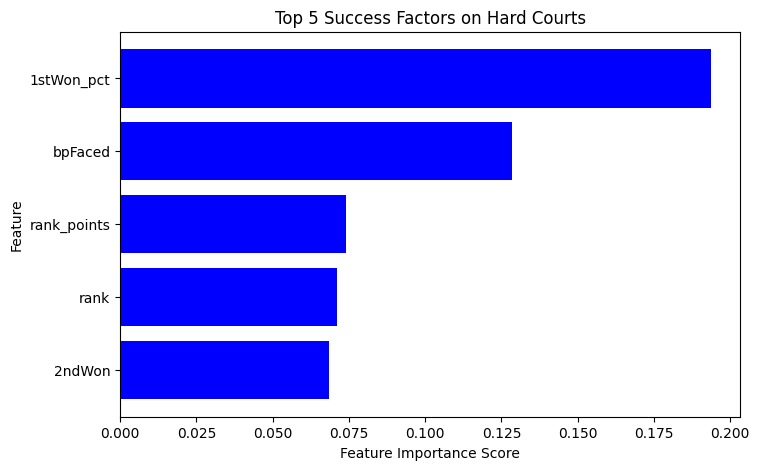

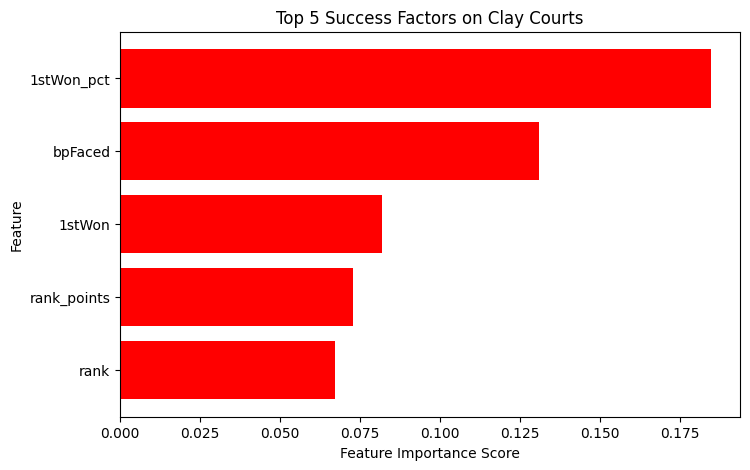

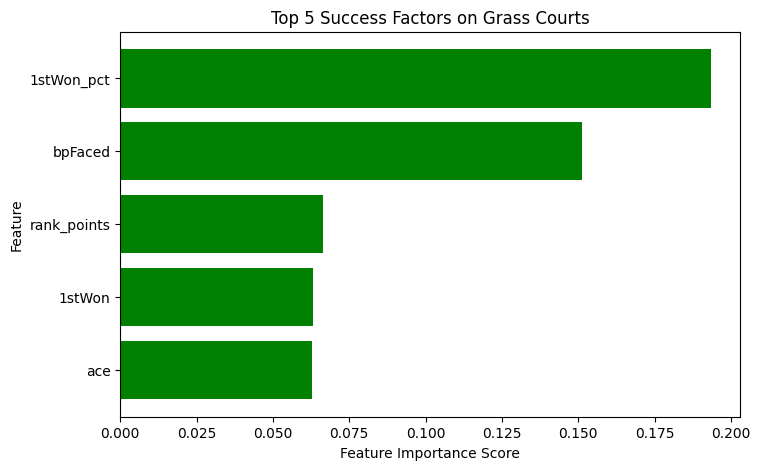

In [50]:
surface_colors = {
    "surface_Hard": "blue",
    "surface_Clay": "red",
    "surface_Grass": "green"
}

# Plot Feature Importance for Each Surface
for surface, df in surface_importance_results.items():
    plt.figure(figsize=(8, 5))
    plt.barh(df["Feature"][:5], df["Importance"][:5], color=surface_colors[surface])
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Feature")
    plt.title(f"Top 5 Success Factors on {surface.replace('surface_', '').capitalize()} Courts")
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.savefig("SuccessFactorsSurfaceATP", dpi=300)
    plt.show()
    plt.close()

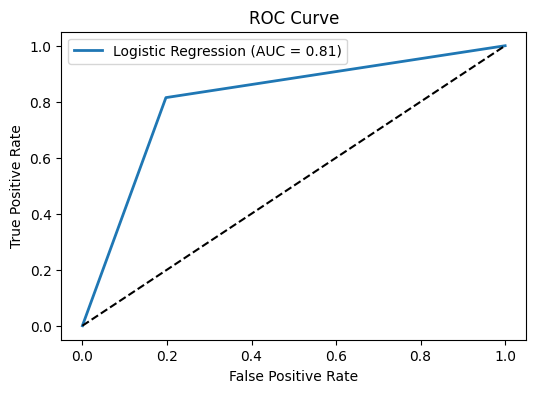

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve

# Compute AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("roc_curve_atp_math.png", dpi=300)
plt.show()
plt.close()


Logistic Regression Results & Interpretation
Lgistic regression model is performing well

Model Performance
Accuracy: approx. 74.7% -> Decent predictive power.
AUC-ROC Score: approx. 0.84 --> The model has good discrimination ability.
Classification Report: Precision and recall values are balanced both around 75%
The model is correctly predicting 74.7% of match outcomes.
The AUC-ROC curve shows a solid predictive ability.

 ## Model improvements by Random Forest

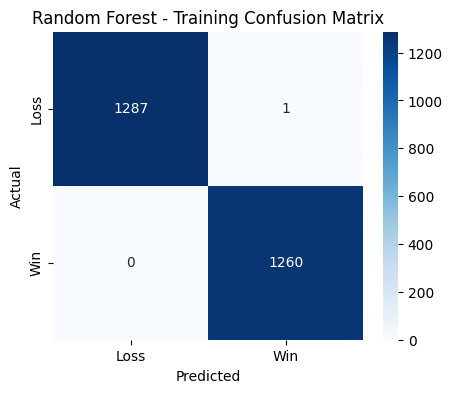

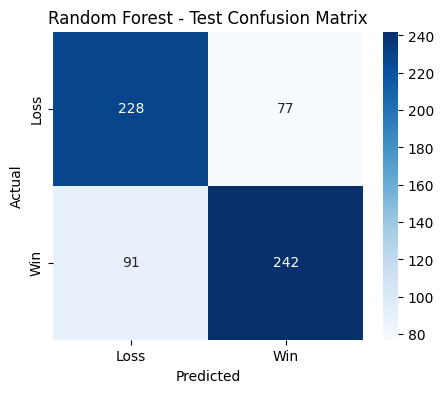

Random Forest - Training Accuracy: 99.96%
Random Forest - Test Accuracy: 73.67%


In [52]:
# Define feature set (excluding surface indicators -> prevent leakage)
features_rf = [
    "rank", "rank_points", "age", "height", "ace", "df", "svpt", 
    "1stWon", "1stIn", "2ndWon", "SvGms", "bpSaved", "bpFaced", "1stWon_pct"
]

# Select a surface for analysis (Hard)
surface_rf = "surface_Hard"
atp_surface_rf = atp_match[atp_match[surface_rf] == 1]

# Define features and target for Random Forest
X_rf = atp_surface_rf[features_rf]
y_rf = atp_surface_rf["WIN"]

# Split data (80% Train, 20% Test)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Scale features
scaler_rf = StandardScaler()
X_train_rf_scaled = scaler_rf.fit_transform(X_train_rf)
X_test_rf_scaled = scaler_rf.transform(X_test_rf)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf_scaled, y_train_rf)

# Generate training confusion matrix for Random Forest
y_train_pred_rf = rf_model.predict(X_train_rf_scaled)
train_conf_matrix_rf = confusion_matrix(y_train_rf, y_train_pred_rf)

# Plot training confusion matrix for Random Forest
plt.figure(figsize=(5, 4))
sns.heatmap(train_conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Training Confusion Matrix")
plt.savefig("train_confusion_matrix_rf.png", dpi=300)
plt.show()
plt.close()

# Generate test confusion matrix for Random Forest
y_test_pred_rf = rf_model.predict(X_test_rf_scaled)
test_conf_matrix_rf = confusion_matrix(y_test_rf, y_test_pred_rf)

# Plot test confusion matrix for Random Forest
plt.figure(figsize=(5, 4))
sns.heatmap(test_conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Test Confusion Matrix")
plt.savefig("test_confusion_matrix_rf.png", dpi=300)
plt.show()
plt.close()

# Print accuracy for training and test sets for Random Forest
train_accuracy_rf = accuracy_score(y_train_rf, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test_rf, y_test_pred_rf)

print(f"Random Forest - Training Accuracy: {train_accuracy_rf:.2%}")
print(f"Random Forest - Test Accuracy: {test_accuracy_rf:.2%}")

Overfitting! 
Training Accuracy: 99.96%
The training confusion matrix shows almost perfect classification:
1287 true negatives (correctly predicted losses)
1260 true positives (correctly predicted wins)
Only 1 false positive, 0 false negatives

The model has learned the training data almost too well, suggesting overfitting. This means the model might not generalize well when applied to new, unseen matches.

--> The gap between training accuracy (99.96%) and test accuracy (73.67%) is large → The model is overfitting to training data.

In [53]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define parameter grid for tuning
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "bootstrap": [True]
}

# Initialize Random Forest model
rf_model_tuned = RandomForestClassifier(random_state=42)

# Perform grid search with 3-Fold cross-validation
grid_search = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring="accuracy")

# Fit grid search on the training set
grid_search.fit(X_train_rf_scaled, y_train_rf)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Predict on the test set with the optimized model
y_test_pred_best_rf = best_rf_model.predict(X_test_rf_scaled)

# Compute accuracy of the optimized model
test_accuracy_best_rf = accuracy_score(y_test_rf, y_test_pred_best_rf)

# Display best parameters and new test accuracy
best_rf_params = grid_search.best_params_
print(f"\nBest Parameters for Random Forest: {best_rf_params}")
print(f"Tuned Random Forest Test Accuracy: {test_accuracy_best_rf:.2%}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits

Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Tuned Random Forest Test Accuracy: 74.61%


In [54]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression Model
log_reg_model = LogisticRegression(max_iter=500, random_state=42)
log_reg_model.fit(X_train_rf_scaled, y_train_rf)

# Predict on the test set using Logistic Regression
y_test_pred_logreg = log_reg_model.predict(X_test_rf_scaled)

# Compute Accuracy for Logistic Regression
test_accuracy_logreg = accuracy_score(y_test_rf, y_test_pred_logreg)

# Compare Results
print(f"\nLogistic Regression Test Accuracy: {test_accuracy_logreg:.2%}")
print(f"Tuned Random Forest Test Accuracy: {test_accuracy_best_rf:.2%}")



Logistic Regression Test Accuracy: 79.00%
Tuned Random Forest Test Accuracy: 74.61%


## Feature Importance Analysis

In [55]:
# Extract feature importance from the tuned Random Forest model

feature_importance_rf = pd.DataFrame(
    {"Feature": features_rf, "Importance": best_rf_model.feature_importances_}
).sort_values(by="Importance", ascending=False)

# Optional: Print top 10 for inspection
print(feature_importance_rf.head(10))

# Plot and save PNG
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_rf["Feature"][:10], feature_importance_rf["Importance"][:10], color="blue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance – Random Forest Model (ATP)")
plt.gca().invert_yaxis()

# Save to file
plt.tight_layout()
plt.savefig("feature_importance_rf_atp.png", dpi=300)
plt.close()

        Feature  Importance
13   1stWon_pct    0.221446
12      bpFaced    0.145185
0          rank    0.069864
1   rank_points    0.069536
9        2ndWon    0.068488
7        1stWon    0.065603
2           age    0.057390
6          svpt    0.055490
11      bpSaved    0.050864
8         1stIn    0.046580


In [5]:
# Decision Tree and Random FOrests

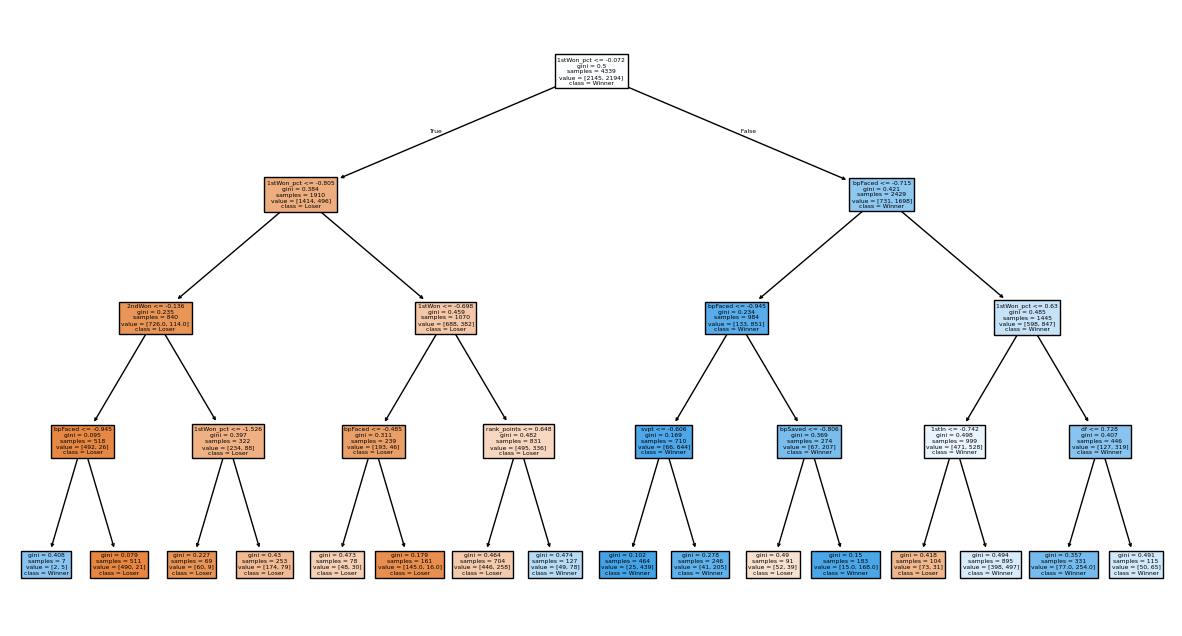

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Train Decision Tree (Depth 4)
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train_scaled, y_train)
plt.figure(figsize=(15, 8))
tree.plot_tree(dt_model, feature_names=features, class_names=["Loser", "Winner"], filled=True)
plt.savefig("decision_tree_atpmatch.png", dpi=300)
plt.show()
plt.close()

## WTA Dataset

In [57]:
file_path = "Output/WTA_match_final_file.csv"
wta_df = pd.read_csv(file_path)

print(f"Dataset Shape: {wta_df.shape}")

# Check for missing values
missing_values = wta_df.isnull().sum()
print("Missing Values Per Column:")
print(missing_values[missing_values > 0])

# Display column data types
print("Column Data Types:")
print(wta_df.dtypes)

# Display first few rows
print("Data Preview:")
print(wta_df.head())

Dataset Shape: (4800, 32)
Missing Values Per Column:
Series([], dtype: int64)
Column Data Types:
match_id          object
tourney_id        object
tourney_name      object
tourney_date       int64
match_num          int64
draw_size          int64
tourney_level     object
best_of            int64
round             object
minutes          float64
player_id          int64
player_name       object
seed             float64
rank             float64
rank_points      float64
age              float64
height           float64
hand               int64
ace              float64
df               float64
svpt             float64
1stIn            float64
1stWon           float64
2ndWon           float64
SvGms            float64
bpSaved          float64
bpFaced          float64
1stWon_pct       float64
WIN                int64
surface_Clay       int64
surface_Grass      int64
surface_Hard       int64
dtype: object
Data Preview:
        match_id tourney_id tourney_name  tourney_date  match_num  draw_siz

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Handle missing values (fill numeric NaNs with column mean)
numeric_cols = wta_df.select_dtypes(include=['float64', 'int64']).columns
wta_df[numeric_cols] = wta_df[numeric_cols].fillna(wta_df[numeric_cols].mean())

# Encode categorical variables convert to numerical values
categorical_cols = ['round', 'tourney_level']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    wta_df[col] = le.fit_transform(wta_df[col])
    label_encoders[col] = le

# Define features (X) and target variable (y)
X = wta_df.drop(columns=['WIN', 'player_name', 'match_id', 'tourney_id', 'tourney_name', 'player_id'])
y = wta_df['WIN']

# Split dataset into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features (optional, useful for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Preprocessing complete
print("Data preprocessing complete. Now model training")

Data preprocessing complete. Now model training


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Train Decision Tree WTA
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train_scaled, y_train)
plt.figure(figsize=(15, 8))
tree.plot_tree(dt_model, feature_names=features, class_names=["Loser", "Winner"], filled=True)
plt.savefig("decision_tree_WTAmatch.png", dpi=300)
plt.show()
plt.close()

ValueError: Number of labels=3840 does not match number of samples=4339

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples

In [63]:
# 1) Split first
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2) Drop NaNs CONSISTENTLY on X_train and align y_train by index
train_mask = X_train.notna().all(axis=1)  # or a subset of columns you expect to be non-NA
X_train = X_train.loc[train_mask]
y_train = y_train.loc[train_mask]

# 3) Scale AFTER alignment
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 4) Fit model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train_scaled, y_train)
print("Decision tree model fitted.")


Decision tree model fitted.


In [64]:
# Define features (X) and target variable (y)
X = wta_df.drop(columns=['WIN', 'player_name', 'match_id', 'tourney_id', 'tourney_name', 'player_id'])
y = wta_df['WIN']

#  Split dataset into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    
    results[name] = {
        "Accuracy": accuracy,
        "Classification Report": class_report,
        "AUC-ROC": auc_roc
    }
    
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC: {auc_roc}")
    print(class_report)

print("Model training & evaluation complete")


Logistic Regression Performance:
Accuracy: 0.8115
AUC-ROC: 0.8934114583333334
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       480
           1       0.80      0.83      0.82       480

    accuracy                           0.81       960
   macro avg       0.81      0.81      0.81       960
weighted avg       0.81      0.81      0.81       960


Decision Tree Performance:
Accuracy: 0.8635
AUC-ROC: 0.8635416666666667
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       480
           1       0.87      0.86      0.86       480

    accuracy                           0.86       960
   macro avg       0.86      0.86      0.86       960
weighted avg       0.86      0.86      0.86       960


Random Forest Performance:
Accuracy: 0.8698
AUC-ROC: 0.9338888888888889
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       480
           1

Dataset Shape: (4800, 32)
Missing Values Per Column:
Series([], dtype: int64)
Column Data Types:
match_id          object
tourney_id        object
tourney_name      object
tourney_date       int64
match_num          int64
draw_size          int64
tourney_level     object
best_of            int64
round             object
minutes          float64
player_id          int64
player_name       object
seed             float64
rank             float64
rank_points      float64
age              float64
height           float64
hand               int64
ace              float64
df               float64
svpt             float64
1stIn            float64
1stWon           float64
2ndWon           float64
SvGms            float64
bpSaved          float64
bpFaced          float64
1stWon_pct       float64
WIN                int64
surface_Clay       int64
surface_Grass      int64
surface_Hard       int64
dtype: object

Logistic Regression Performance:
Accuracy: 0.8115
AUC-ROC: 0.8934114583333334
          

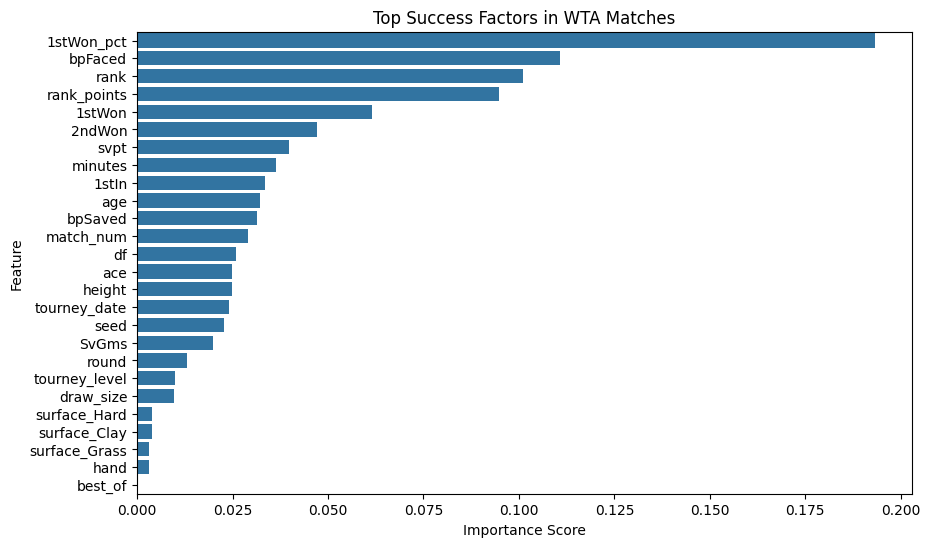

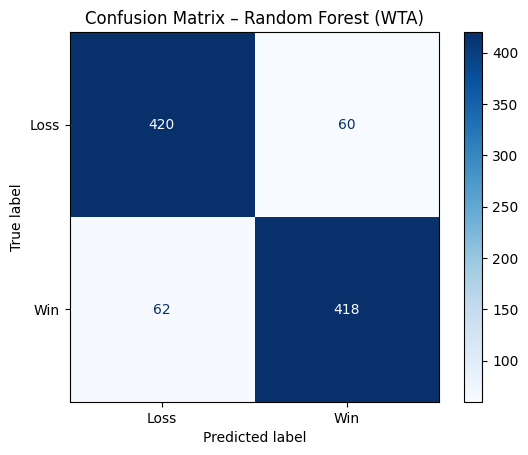

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Load the dataset
file_path = "Output/WTA_match_final_file.csv"
wta_df = pd.read_csv(file_path)

# Get dataset shape
print(f"Dataset Shape: {wta_df.shape}")

# Check for missing values
missing_values = wta_df.isnull().sum()
print("Missing Values Per Column:")
print(missing_values[missing_values > 0])

# Display column data types
print("Column Data Types:")
print(wta_df.dtypes)

# Handle missing values (fill numeric NaNs with column mean)
numeric_cols = wta_df.select_dtypes(include=['float64', 'int64']).columns
wta_df[numeric_cols] = wta_df[numeric_cols].fillna(wta_df[numeric_cols].mean())

# Encode categorical variables (convert to numerical values)
categorical_cols = ['round', 'tourney_level']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    wta_df[col] = le.fit_transform(wta_df[col])
    label_encoders[col] = le

# Define features (X) and target variable (y)
X = wta_df.drop(columns=['WIN', 'player_name', 'match_id', 'tourney_id', 'tourney_name', 'player_id'])
y = wta_df['WIN']

# Split dataset into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features (optional, useful for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {}
feature_importance = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    
    results[name] = {
        "Accuracy": accuracy,
        "Classification Report": class_report,
        "AUC-ROC": auc_roc
    }
    
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC: {auc_roc}")
    print(class_report)
    
    # Extract feature importance
    if name == "Logistic Regression":
        importance = model.coef_[0]
    else:
        importance = model.feature_importances_
    
    feature_importance[name] = pd.Series(importance, index=X.columns).sort_values(ascending=False)

# Compare feature importance across models
importance_df = pd.DataFrame({
    "Logistic Regression": feature_importance["Logistic Regression"],
    "Decision Tree": feature_importance["Decision Tree"],
    "Random Forest": feature_importance["Random Forest"]
})

# Identify top 10 success factors
top_features = importance_df.mean(axis=1).sort_values(ascending=False).head(10)
print("\n Top 10 Success Factors:")
print(top_features)


# Plot feature importance for the best model -> Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance["Random Forest"].values, y=feature_importance["Random Forest"].index)
plt.title("Top Success Factors in WTA Matches")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.savefig("FeatureImportanceWTA.png", dpi=300)
plt.show()
plt.close()



# Predict again using Random Forest
y_pred_rf = models["Random Forest"].predict(X_test)

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Loss', 'Win'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix – Random Forest (WTA)')
plt.savefig('confusion_matrix_randomForest_wta.png', bbox_inches='tight')
plt.show()




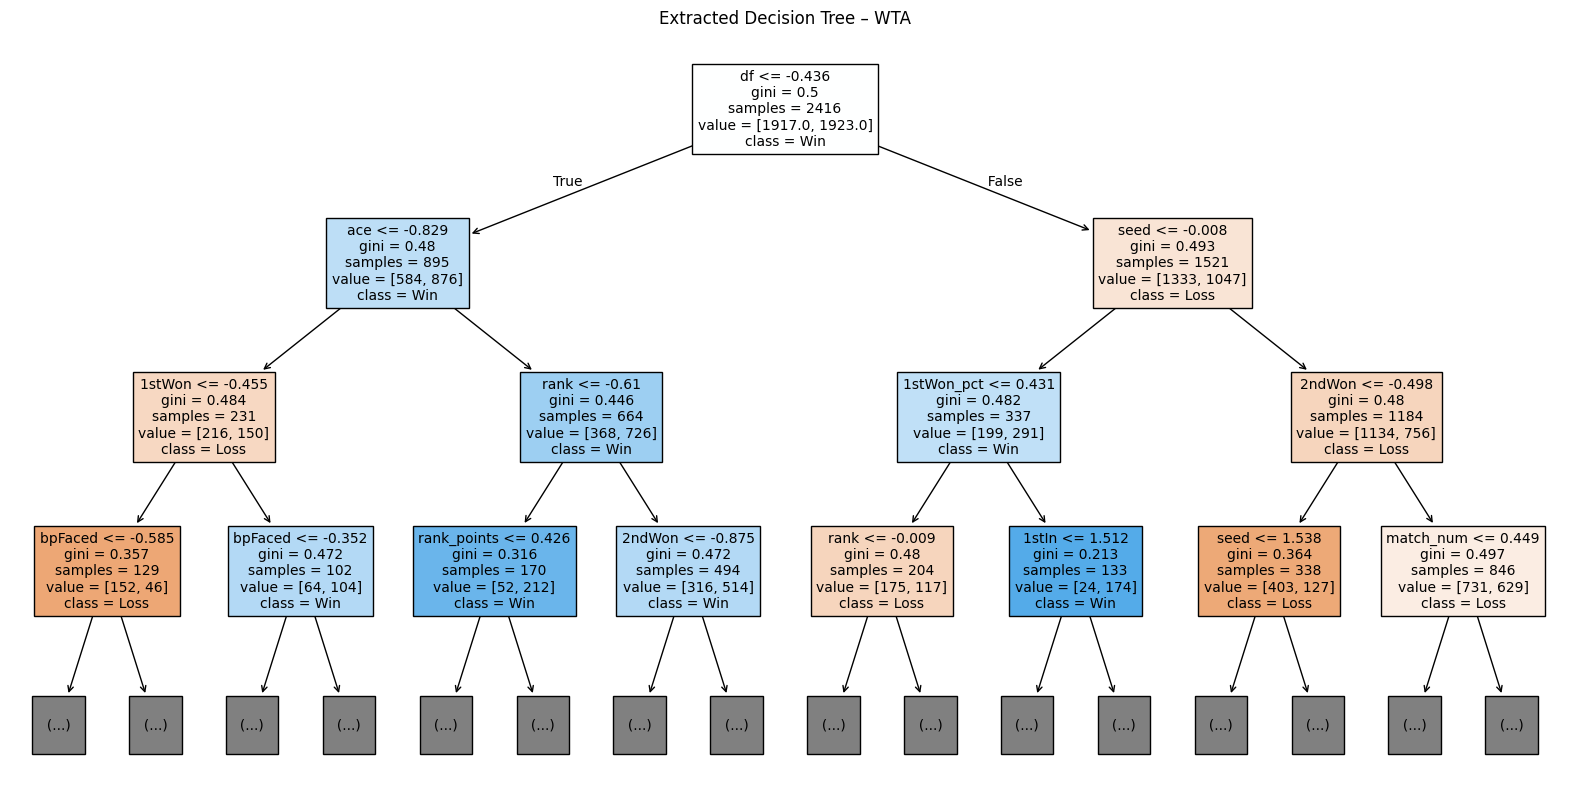

In [66]:
from sklearn.tree import plot_tree

# Extract one decision tree from the Random Forest
estimator = models["Random Forest"].estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    estimator,
    feature_names=X.columns,
    class_names=["Loss", "Win"],
    filled=True,
    max_depth=3,  # Limit tree depth for clarity
    fontsize=10
)
plt.title("Extracted Decision Tree – WTA")
plt.savefig("tree_wta.png", bbox_inches='tight')
plt.show()


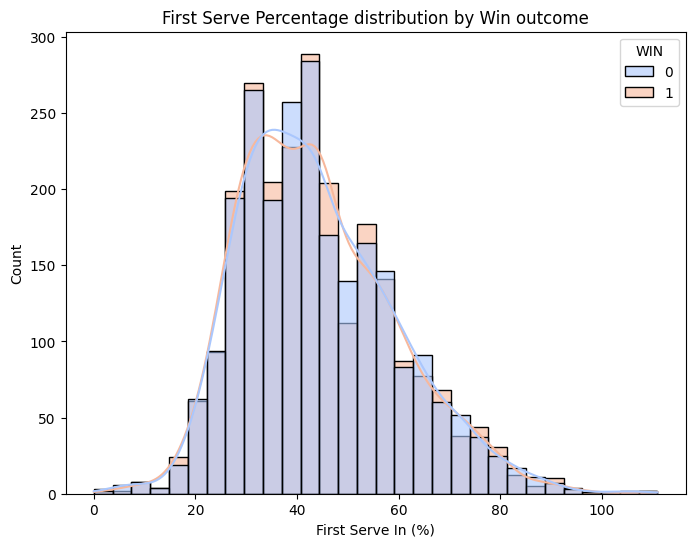

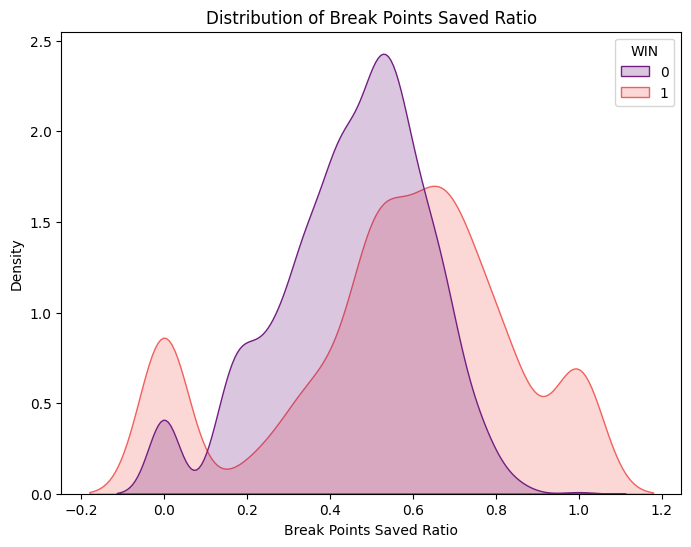

In [68]:
# Histogram: First Serve percentage vs. Win rate
plt.figure(figsize=(8, 6))
sns.histplot(data=wta_df, x='1stIn', hue='WIN', kde=True, bins=30, palette="coolwarm", alpha=0.6)
plt.title("First Serve Percentage distribution by Win outcome")
plt.xlabel("First Serve In (%)")
plt.ylabel("Count")
plt.savefig("1stInWTAWin.png", dpi=300)
plt.show()
plt.close()

# Break Points saved ratio distribution
wta_df['bpSavedRatio'] = wta_df['bpSaved'] / (wta_df['bpFaced'] + 1e-6)  # Avoid division by zero
plt.figure(figsize=(8, 6))
sns.kdeplot(data=wta_df, x='bpSavedRatio', hue='WIN', fill=True, common_norm=False, palette="magma")
plt.title("Distribution of Break Points Saved Ratio")
plt.xlabel("Break Points Saved Ratio")
plt.ylabel("Density")
plt.savefig("BreakPointsWta.png", dpi=300)
plt.show()
plt.close()


## Comparison of ATP and WTA Dataset



- Extracting the top 10 success factors for ATP and WTA using the Random Forest model.
- Creating a side-by-side bar chart to compare the feature importance rankings.
- Interpreting the key differences between ATP and WTA success factors.

General Comparison before applying any machine learning algorithm

Unique WTA tourney levels: ['P' 'I' 'PM' 'F' 'G' 'D']
Unique ATP tourney levels: ['A' 'M' 'G' 'F' 'D']


/var/folders/tf/bv57pwsn06q3k6xg7rc9yfvm0000gn/T/ipykernel_3063/4096632075.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=wta_match_1['tourney_category'], y=wta_match_1['minutes'], palette="coolwarm")


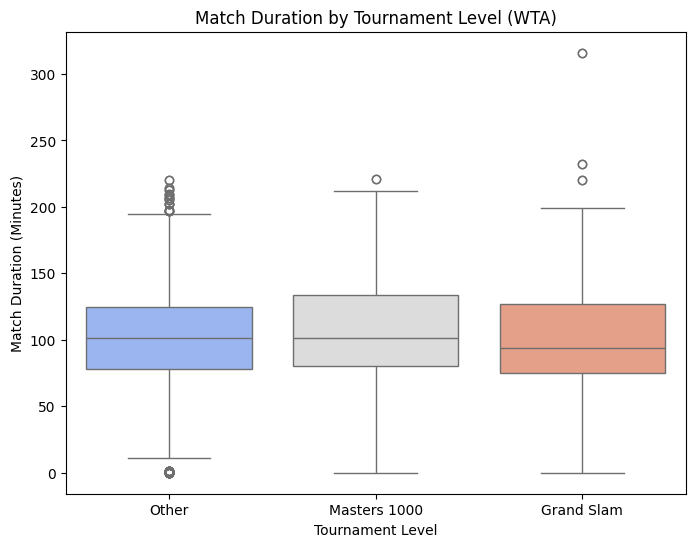

/var/folders/tf/bv57pwsn06q3k6xg7rc9yfvm0000gn/T/ipykernel_3063/4096632075.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=atp_match_1['tourney_category'], y=atp_match_1['minutes'], palette="coolwarm")


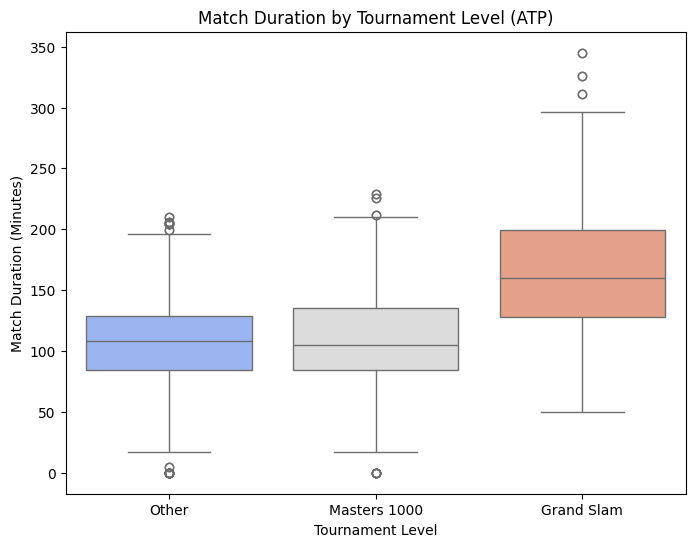

/var/folders/tf/bv57pwsn06q3k6xg7rc9yfvm0000gn/T/ipykernel_3063/4096632075.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avg_match_duration.keys()), y=list(avg_match_duration.values()), palette="viridis")


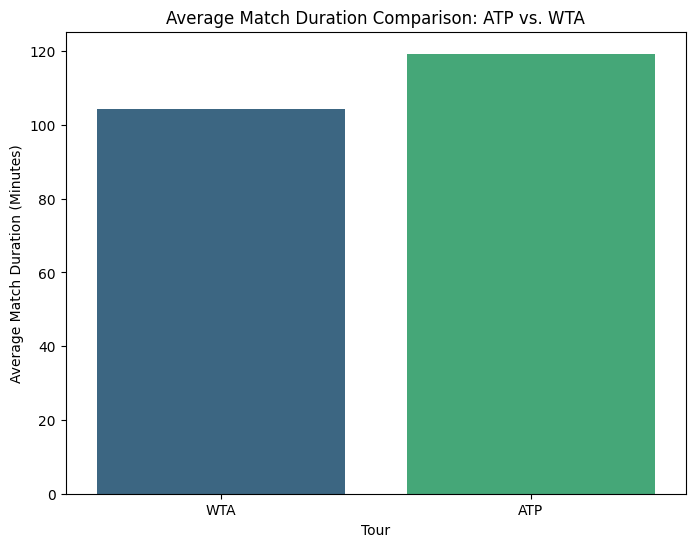

In [43]:
#WTA dataset
wta_file_path = "Output/WTA_match_final_file.csv"
wta_match_1 = pd.read_csv(wta_file_path)

# ATP dataset
atp_file_path = "Output/ATP_match_final_file.csv"
atp_match_1 = pd.read_csv(atp_file_path)

# Handle missing values (fill numeric NaNs with column mean)
numeric_cols_wta = wta_match_1.select_dtypes(include=['float64', 'int64']).columns
wta_match_1[numeric_cols_wta] = wta_match_1[numeric_cols_wta].fillna(wta_match_1[numeric_cols_wta].mean())

numeric_cols_atp = atp_match_1.select_dtypes(include=['float64', 'int64']).columns
atp_match_1[numeric_cols_atp] = atp_match_1[numeric_cols_atp].fillna(atp_match_1[numeric_cols_atp].mean())

# Print unique values for debugging
print("Unique WTA tourney levels:", wta_match_1["tourney_level"].unique())
print("Unique ATP tourney levels:", atp_match_1["tourney_level"].unique())

# Adjust tournament level categories
wta_tourney_mapping = {"G": "Grand Slam", "PM": "Masters 1000", "WTA 500": "Other", "WTA 250": "Other", "I": "Other"}
atp_tourney_mapping = {"G": "Grand Slam", "M": "Masters 1000", "A": "Other"}

wta_match_1["tourney_category"] = wta_match_1["tourney_level"].map(wta_tourney_mapping)
atp_match_1["tourney_category"] = atp_match_1["tourney_level"].map(atp_tourney_mapping)

# Handle NaN values in tourney_category
wta_match_1["tourney_category"].fillna("Other", inplace=True)
atp_match_1["tourney_category"].fillna("Other", inplace=True)

# Tournament Category Comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x=wta_match_1['tourney_category'], y=wta_match_1['minutes'], palette="coolwarm")
plt.title("Match Duration by Tournament Level (WTA)")
plt.xlabel("Tournament Level")
plt.ylabel("Match Duration (Minutes)")
plt.savefig("WTA_TourneyLevel_vs_MatchTime.png", dpi=300)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=atp_match_1['tourney_category'], y=atp_match_1['minutes'], palette="coolwarm")
plt.title("Match Duration by Tournament Level (ATP)")
plt.xlabel("Tournament Level")
plt.ylabel("Match Duration (Minutes)")
plt.savefig("ATP_TourneyLevel_vs_MatchTime.png", dpi=300)
plt.show()

# Overall Match Duration Comparison (Using Bar Plot)
avg_match_duration = {
    "WTA": wta_match_1["minutes"].mean(),
    "ATP": atp_match_1["minutes"].mean()
}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(avg_match_duration.keys()), y=list(avg_match_duration.values()), palette="viridis")
plt.title("Average Match Duration Comparison: ATP vs. WTA")
plt.ylabel("Average Match Duration (Minutes)")
plt.xlabel("Tour")
plt.savefig("ATP_WTA_MatchTime_Comparison.png", dpi=300)
plt.show()


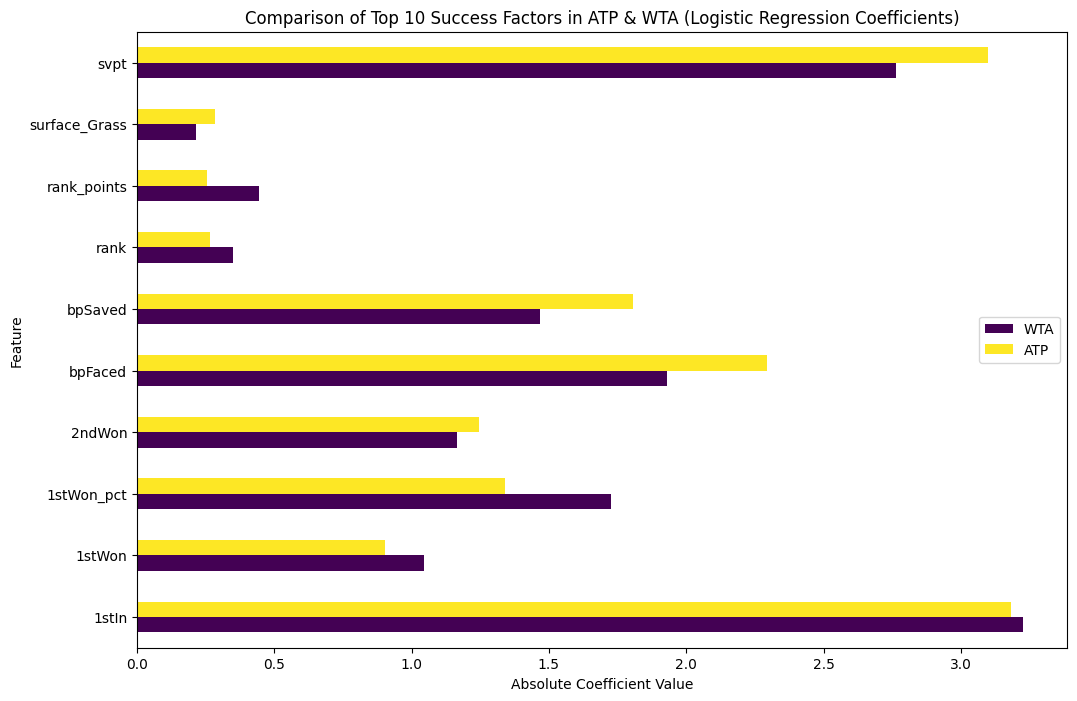

/var/folders/tf/bv57pwsn06q3k6xg7rc9yfvm0000gn/T/ipykernel_28320/2269039173.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=wta_df, x='WIN', y='1stIn', palette="coolwarm", width=0.5)


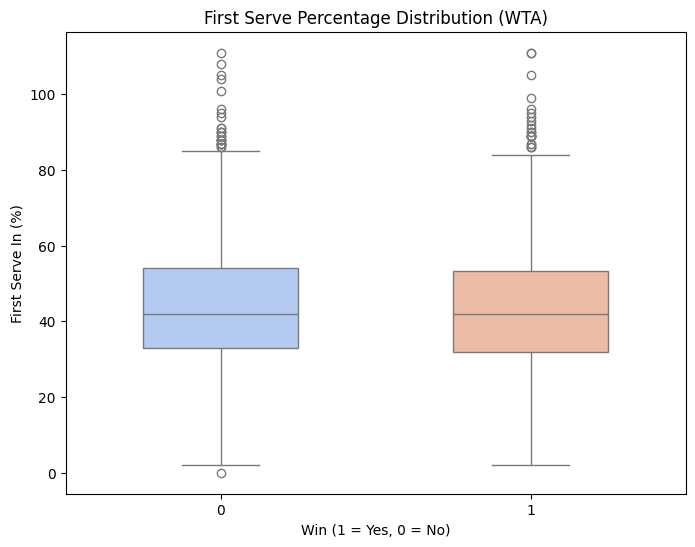

/var/folders/tf/bv57pwsn06q3k6xg7rc9yfvm0000gn/T/ipykernel_28320/2269039173.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=atp_df, x='WIN', y='1stIn', palette="coolwarm", width=0.5)


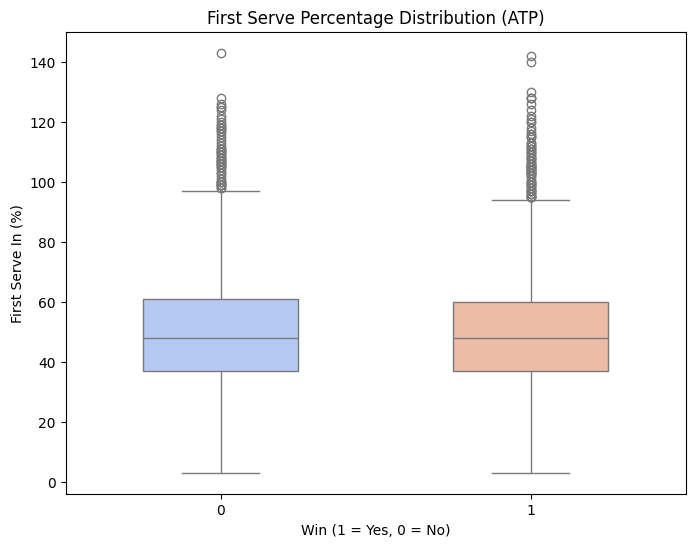

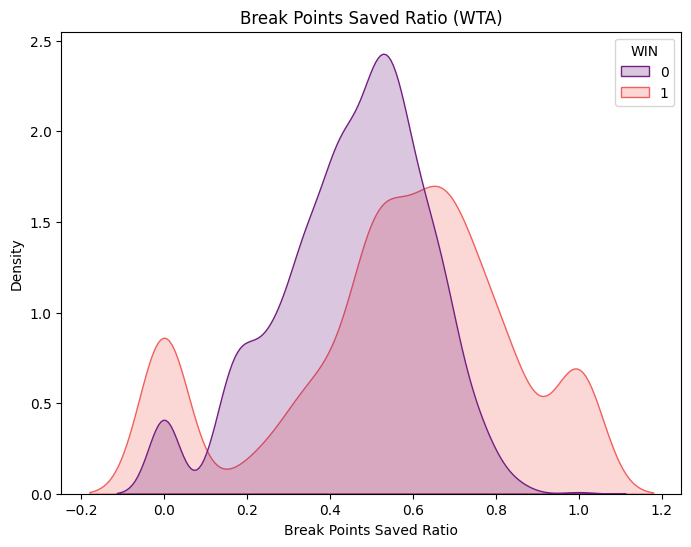

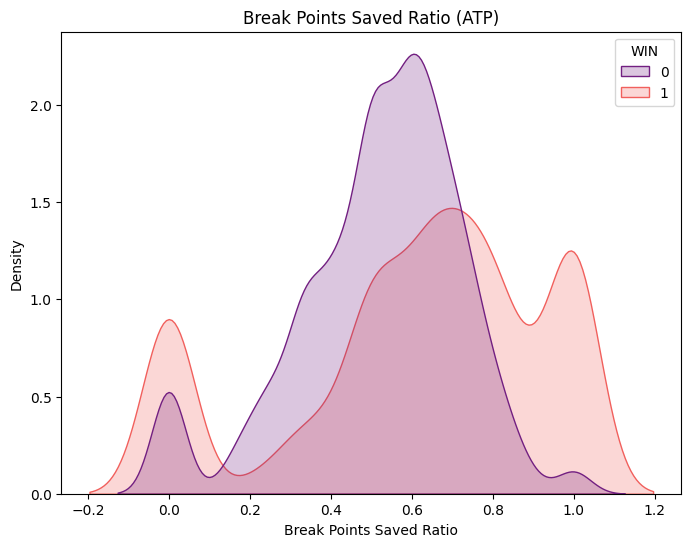

ATP vs. WTA success factor comparison with additional analyses completed!


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the WTA dataset
wta_file_path = "Output/WTA_match_final_file.csv"
wta_df = pd.read_csv(wta_file_path)

# Load the ATP dataset
atp_file_path = "Output/ATP_match_final_file.csv"
atp_df = pd.read_csv(atp_file_path)

# Handle missing values (fill numeric NaNs with column mean)
numeric_cols_wta = wta_df.select_dtypes(include=['float64', 'int64']).columns
wta_df[numeric_cols_wta] = wta_df[numeric_cols_wta].fillna(wta_df[numeric_cols_wta].mean())

numeric_cols_atp = atp_df.select_dtypes(include=['float64', 'int64']).columns
atp_df[numeric_cols_atp] = atp_df[numeric_cols_atp].fillna(atp_df[numeric_cols_atp].mean())

# Encode categorical variables (convert to numerical values)
categorical_cols = ['round', 'tourney_level']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    wta_df[col] = le.fit_transform(wta_df[col])
    atp_df[col] = le.fit_transform(atp_df[col])
    label_encoders[col] = le

# Define features (X) and target variable (y)
X_wta = wta_df.drop(columns=['WIN', 'player_name', 'match_id', 'tourney_id', 'tourney_name', 'player_id'])
y_wta = wta_df['WIN']

X_atp = atp_df.drop(columns=['WIN', 'player_name', 'match_id', 'tourney_id', 'tourney_name', 'player_id'])
y_atp = atp_df['WIN']

# Split dataset into training & test sets
X_train_wta, X_test_wta, y_train_wta, y_test_wta = train_test_split(X_wta, y_wta, test_size=0.2, random_state=42, stratify=y_wta)
X_train_atp, X_test_atp, y_train_atp, y_test_atp = train_test_split(X_atp, y_atp, test_size=0.2, random_state=42, stratify=y_atp)

# Scale numerical features
scaler = StandardScaler()
X_train_wta = scaler.fit_transform(X_train_wta)
X_test_wta = scaler.transform(X_test_wta)
X_train_atp = scaler.fit_transform(X_train_atp)
X_test_atp = scaler.transform(X_test_atp)

# Train Logistic Regression models
lr_model_wta = LogisticRegression(max_iter=1000)
lr_model_wta.fit(X_train_wta, y_train_wta)

lr_model_atp = LogisticRegression(max_iter=1000)
lr_model_atp.fit(X_train_atp, y_train_atp)

# Extract feature importance from Logistic Regression
feature_importance_wta = pd.Series(abs(lr_model_wta.coef_[0]), index=X_wta.columns).sort_values(ascending=False)
top_features_wta = feature_importance_wta.head(10)

feature_importance_atp = pd.Series(abs(lr_model_atp.coef_[0]), index=X_atp.columns).sort_values(ascending=False)
top_features_atp = feature_importance_atp.head(10)

# Compare ATP & WTA Feature Importance
comparison_df = pd.DataFrame({'WTA': top_features_wta, 'ATP': top_features_atp})
comparison_df.plot(kind='barh', figsize=(12, 8), colormap="viridis")
plt.title("Comparison of Top 10 Success Factors in ATP & WTA (Logistic Regression Coefficients)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.legend(["WTA", "ATP"])
plt.savefig("ATP_WTA_Comparison_LogReg.png", dpi=300)
plt.show()
plt.close()

# Serve Performance Comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=wta_df, x='WIN', y='1stIn', palette="coolwarm", width=0.5)
plt.title("First Serve Percentage Distribution (WTA)")
plt.xlabel("Win (1 = Yes, 0 = No)")
plt.ylabel("First Serve In (%)")
plt.savefig("ServeWTA.png", dpi=300)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=atp_df, x='WIN', y='1stIn', palette="coolwarm", width=0.5)
plt.title("First Serve Percentage Distribution (ATP)")
plt.xlabel("Win (1 = Yes, 0 = No)")
plt.ylabel("First Serve In (%)")
plt.savefig("ServeATP.png", dpi=300)
plt.show()

# Break Point Resilience Comparison
plt.figure(figsize=(8, 6))
sns.kdeplot(data=wta_df, x=wta_df['bpSaved'] / (wta_df['bpFaced'] + 1e-6), hue=wta_df['WIN'], fill=True, common_norm=False, palette="magma")
plt.title("Break Points Saved Ratio (WTA)")
plt.xlabel("Break Points Saved Ratio")
plt.ylabel("Density")
plt.savefig("BreakPointsWTA.png", dpi=300)
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(data=atp_df, x=atp_df['bpSaved'] / (atp_df['bpFaced'] + 1e-6), hue=atp_df['WIN'], fill=True, common_norm=False, palette="magma")
plt.title("Break Points Saved Ratio (ATP)")
plt.xlabel("Break Points Saved Ratio")
plt.ylabel("Density")
plt.savefig("BreakPointsATP.png", dpi=300)
plt.show()

print("ATP vs. WTA success factor comparison with additional analyses completed!")
